<h2 style="font-family: 'Helvetica'; font-size: 36px; color: #AA336A;">🌟 Legendary Pokemon Classifier 🌟
<p style="color: #87CEEB; font-family: 'Segoe Script', cursive;"> 🦄💫 How do we know if it's legendary? 🦄💫</p></h2>

<img src="https://media.tenor.com/UZJd1pjj4NMAAAAC/surprised-pikachu.gif" alt="So.Many.Libraries.">


In [1]:
#SO MANY LIBRARIES!!!!!

In [2]:
# importing dependencies 

# !pip install ydata-profiling 
#installing tahe library

!pip install missingno 
!pip install imbalanced-learn

In [3]:
# Basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # great library for visualisating the distribution of nulls!
import statsmodels.api as sm

# Hypothesis Testing
import math
from scipy import stats
from scipy.stats import ttest_ind

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn .metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

#Additional binary classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Other
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
%matplotlib inline
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
## Table of Contents

#1. Getting the Data

# <span style="color:blue">Why should we be interested in</span> <span style="color:red; font-family:'Segoe Script', cursive;">legendary</span> <span style="color:green; font-family:'Comic Sans MS', cursive;">pokemon</span>? 🌟🔥🌈


<img src="https://media.tenor.com/u-qWcV0GwbkAAAAC/mew-pokemon.gif" alt="Legendary Pokemon Mew">

As most Pokemon enthusiasts would know, legendary Pokemon are rare creatures that have exceptional power, abilties and base stats. They often play a key role in the Pokemon storyline and mythology. Acquiring one has long been an attractive challenge to players as they can have a major impact on battle strategies and outcomes. Legendary Pokemon also look pretty cool :P 

## Table of Contents

**0 Getting the data**

**1 Setting the Scene: Preliminary exploration using Isolation Forest and Hypothesis Testing**

**2 Data Cleaning and Preprocessing: Feature Extraction and Feature Engineering**

**3 Further Cleaning and Feature Selection: Using Domain Knowledge, Correlation Analysis, Low Variance Filter and Feature Importance**

**4 Logistic Regression and Oversampling: SMOTE, RandomOverSampler, StratifiedKFolds Cross Validation and Hyperparameter Tuning**

**5 Other Binary Classification Models: KNeighboursClassifier, Decision Tree Classifier and Gaussian Naive Bayes**

**6 Conclusion**



#### Dataset obtained from [here](https://www.kaggle.com/datasets/rounakbanik/pokemon/discussion?resource=download). Credits to Rounak Banik

In [5]:
data = pd.read_csv('pokemon.csv')
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [6]:
data.info() #fortunately, the names of the data have been standardized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

**For the sake of logical flow and structure, I have decided to put this part first, preceding all other parts of the project, in order to provide a persuasive reason as to why this project is being undertaken in the first place. As such, I will be using a version of the same dataset that has been partially cleaned.**

**Are legendary pokemon truly rarer and more anomalous than non-legendary pokemon?** To find out, we can use a combination of **Anomaly Testing(Isolation Forest)** and using the results thereafter to conduct a **two sample hypothesis test**. However, to determine the true **direction** of the anomaly (do legendary pokemon have exceptionally **better** or exceptionally **crappier** stats than non-legendary pokemon?), we would have to look at our **Tableau Visaulisations!

<h2 style="font-family: 'Constantia'; font-size: 26px; color:#006400;"> 1 🔎 Setting The Scene 🔎
<p style="color:  #93E9BE; font-family: 'Constantia', cursive;"> 🌳Preliminary exploration using Isolation Forest and Hypothesis Testing🌳</p></h2>

In [7]:
rarity_data = pd.read_csv('pokemon_partially_cleaned.csv') #partially cleaned dataset
rarity_data.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,is_genderless
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,60,50,65,fire,None,8.5,1,0,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,80,65,80,fire,None,19.0,1,0,0


<h2 style="color:green; font-family:Comic Sans MS;">🌳 Isolation Forest Model 🌳</h2>

### The isolation forest model is an unsupervised learning model that isolates anomalies or rare occurences within the data by creating a set of random decision trees which split into two. Anomalies can be identified with fewer splits, which means the average path length to its branch is shorter than average (which is why anomaly scores are negative in value). More information [here](https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html).

In [8]:
#Scaling the variables before building an Isolation Forest Model

predictor_variables = rarity_data.drop(columns=['name','japanese_name','abilities'])  # 'is_legendary' is the target variable

# Step 2: Drop the 'type1_' and 'type2_' variables
type1_columns = [col for col in predictor_variables.columns if col.startswith('type1_')]
type2_columns = [col for col in predictor_variables.columns if col.startswith('type2_')]
predictor_variables = predictor_variables.drop(columns=type1_columns + type2_columns)
selected_rarity_features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Create a new DataFrame containing only the selected features
rarity_features_df = predictor_variables[selected_rarity_features].copy()

# Normalize the features (optional but can improve performance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rarity_features_df)
features_df = pd.DataFrame(scaled_features, columns=selected_rarity_features)

In [9]:
#Baseline model

In [10]:
# Create an instance of the IsolationForest class
isolation_forest = IsolationForest(contamination=0.001)  # Adjust contamination based on expected rarity proportion

# Fit the model on the features
isolation_forest.fit(features_df)

# Predict the anomaly scores for each Pokémon (negative values indicate anomalies)
anomaly_scores = isolation_forest.score_samples(features_df)

# Add the anomaly scores to the original DataFrame
rarity_data['AnomalyScore'] = anomaly_scores

In [11]:
# Visualisation of anomaly scores - the lower the anomaly score, the rarer the pokemon

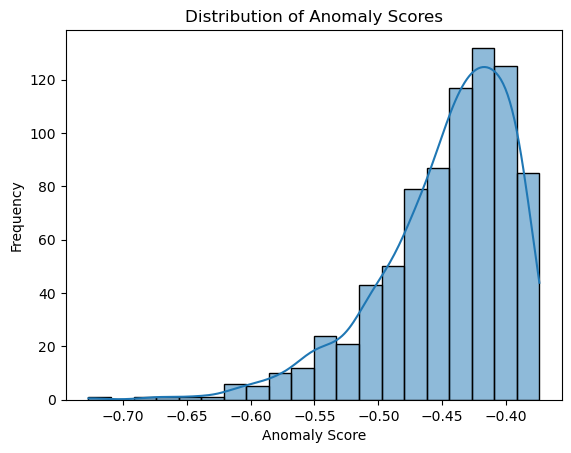

           name  AnomalyScore
212     Shuckle     -0.726837
241     Blissey     -0.676539
112     Chansey     -0.664776
149      Mewtwo     -0.642216
381      Kyogre     -0.636152
745  Wishiwashi     -0.613289
383    Rayquaza     -0.612369
794   Pheromosa     -0.610785
64     Alakazam     -0.608270
382     Groudon     -0.606939


In [12]:
sns.histplot(rarity_data['AnomalyScore'], bins=20, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

rare_pokemon = rarity_data.nsmallest(10, 'AnomalyScore') #lists the top ten most anomalous/rarest/most unique pokemon in the dataset
print(rare_pokemon[['name', 'AnomalyScore']])

In [13]:
# 4 of the most anomalous pokemon are legendary pokemon! But we'll have to tune the model to really know for sure

In [14]:
legendary_pokemon = rare_pokemon[rare_pokemon['is_legendary'] == 1]

# Print the names and AnomalyScores of legendary Pokémon
print(legendary_pokemon[['name', 'AnomalyScore']])

          name  AnomalyScore
149     Mewtwo     -0.642216
381     Kyogre     -0.636152
383   Rayquaza     -0.612369
794  Pheromosa     -0.610785
382    Groudon     -0.606939


In [15]:
#Hyperparameter tuning via GridCv

In [16]:
isolation_forest = IsolationForest()

# Defining the model's hyperparameters and their values so that they can be tuned
param_grid = {
    'n_estimators': [50, 100, 150],    # Number of trees in the forest
    'max_samples': [0.1, 0.2, 0.3],    # Proportion of samples to draw for each tree
    'contamination': [0.01, 0.05, 0.1] # Expected proportion of anomalies (rare Pokémon)
}

# Create a GridSearchCV object with the Isolation Forest model and parameter grid
grid_search = GridSearchCV(isolation_forest, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on the features
grid_search.fit(features_df)

# Get the best hyperparameters from the search
best_hyperparameters = grid_search.best_params_

# Create a new Isolation Forest model with the best hyperparameters
best_isolation_forest = IsolationForest(**best_hyperparameters)

# Fit the best model on the features
best_isolation_forest.fit(features_df)

# Predict the anomaly scores for each Pokémon using the best model
anomaly_scores = best_isolation_forest.score_samples(features_df)

# Add the anomaly scores to the original DataFrame
rarity_data['AnomalyScore'] = anomaly_scores

# Sort the DataFrame by 'AnomalyScore' in ascending order
rarity_data_sorted = rarity_data.sort_values(by='AnomalyScore', ascending=True)

# Get the top ten rarest Pokémon
top_rarest_pokemon = rarity_data_sorted.head(10)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters)

# Print the top ten rarest Pokémon
print("\nTop Ten Rarest Pokémon:")
print(top_rarest_pokemon[['name', 'AnomalyScore']])


Best Hyperparameters:
{'contamination': 0.01, 'max_samples': 0.1, 'n_estimators': 50}

Top Ten Rarest Pokémon:
           name  AnomalyScore
212     Shuckle     -0.705190
241     Blissey     -0.664313
112     Chansey     -0.659211
745  Wishiwashi     -0.650530
382     Groudon     -0.634455
381      Kyogre     -0.625459
383    Rayquaza     -0.623045
770   Pyukumuku     -0.619915
789     Cosmoem     -0.607384
379      Latias     -0.607316


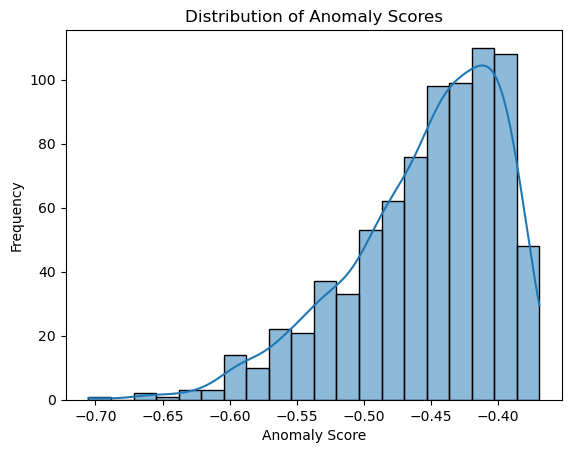

In [17]:
# Plot the distribution of anomaly scores after hyperparameter tuning
sns.histplot(rarity_data['AnomalyScore'], bins=20, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

In [18]:
#After tuning the hyperparameters of the Isolation Forest Model, only two legendary pokemon remain in the top ten. How about the rest of the 70 pokemon in general?

In [19]:
legendary_pokemon1 = top_rarest_pokemon[top_rarest_pokemon['is_legendary'] == 1]
print(legendary_pokemon1[['name', 'AnomalyScore']])

         name  AnomalyScore
382   Groudon     -0.634455
381    Kyogre     -0.625459
383  Rayquaza     -0.623045
789   Cosmoem     -0.607384
379    Latias     -0.607316


In [20]:
# From the filtered data below, we can see that all 70 pokemon are in the top 500 in terms of anomaly scores. But we'll need more concrete proof to irrevocably conlcude that legendary pokemon are indeed rarer and more anomalous than non-legendary pokemon.

In [21]:
legendary_data = rarity_data[rarity_data['is_legendary'] == 1]

# Applying a filter 
non_legendary_data = rarity_data[rarity_data['is_legendary'] == 0]

# Concatenating both legendary and non-legendary Pokémon data
all_data = pd.concat([legendary_data, non_legendary_data])

# Adding a new 'rank' column
all_data = all_data.sort_values(by='AnomalyScore', ascending=True)
all_data['Rank'] = range(1, len(all_data) + 1)

# Let's print it!
legendary_data_filtered = all_data[all_data['is_legendary'] == 1]
print(legendary_data_filtered[['name', 'AnomalyScore', 'Rank']])

           name  AnomalyScore  Rank
382     Groudon     -0.634455     5
381      Kyogre     -0.625459     6
383    Rayquaza     -0.623045     7
789     Cosmoem     -0.607384     9
379      Latias     -0.607316    10
149      Mewtwo     -0.603252    11
797     Kartana     -0.596141    15
248       Lugia     -0.595512    17
718     Diancie     -0.591130    21
719       Hoopa     -0.590616    22
492      Arceus     -0.577838    30
380      Latios     -0.565812    40
794   Pheromosa     -0.563514    41
485   Regigigas     -0.561897    44
793    Buzzwole     -0.561319    45
249       Ho-Oh     -0.550852    60
378   Registeel     -0.550687    61
643      Zekrom     -0.549907    63
482      Dialga     -0.548624    64
717     Zygarde     -0.542553    68
791      Lunala     -0.541599    70
376    Regirock     -0.541200    71
792    Nihilego     -0.541095    72
645      Kyurem     -0.539331    73
798    Guzzlord     -0.538091    75
483      Palkia     -0.535392    80
642    Reshiram     -0.53510

**Now, we can proceed with hypothesis testing using the anomaly scores that have been just generated.** 

<h3 style="color: blue; font-family: 'Courier New';">❤️ Hypothesis testing for two-tailed t-test ❤️</h3>


#### **(H<sub>0</sub>): Legendary pokemon are not rarer and more anomalous then non-legendary pokemon.**

#### **(H<sub>1</sub>): Legendary pokemon are rarer and more anomalous than non-legendary pokemon.**
        



In [22]:
# Extract the AnomalyScores for legendary and non-legendary Pokémon
legendary_scores = legendary_data['AnomalyScore']
non_legendary_scores = non_legendary_data['AnomalyScore']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(legendary_scores, non_legendary_scores, equal_var=False)

alpha = 0.01  # Choosing a conservative alpha
if p_value < alpha:
    print("\033[1;31mThe difference in AnomalyScores between legendary and non-legendary Pokémon is statistically significant.\033[0m Thus, Legendary Pokémon are rarer and more anomalous than non-legendary Pokémon.")
else:
    print("\033[1;32mThere is no significant difference in AnomalyScores between legendary and non-legendary Pokémon.\033[0m Thus, we cannot \033[1;32mreject the null hypothesis\033[0m and conclude that \033[1;32mLegendary Pokémon are not rarer and more anomalous than non-legendary Pokémon.\033[0m")


The difference in AnomalyScores between legendary and non-legendary Pokémon is statistically significant. Thus, Legendary Pokémon are rarer and more anomalous than non-legendary Pokémon.



<span style="font-family: Arial, sans-serif; font-size: 24px;">To confirm the direction of anomalousness</span> <span style="font-family: 'Chewy', cursive; color: red; font-size: 24px;">(are legendary Pokémon anomalously better or crappier)</span><span style="font-family: 'Chewy', cursive; color: linear-gradient(to right, violet, indigo, blue, green, yellow, orange, red); font-size: 24px;">, please proceed to my Tableau visualizations for the rest of the EDA! 🌈</span>


<h2 style="font-family: 'Constantia'; font-size: 36px; color: #CBC3E3;"> 2 🧽 Data Cleaning and Preprocessing 🧽
<p style="color: #CF9FFF; font-family: 'Constantia', cursive;"> 🧹Feature Extraction and Feature Engineering🧹</p></h2>

<img src="https://i.gifer.com/H0hD.gif" alt= "Vacuuuuuuuum">

In [23]:
data.shape

(801, 41)

In [24]:
data.describe().round(1)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,781.0,801.0,703.0,801.0,801.0,801.0,801.0,781.0,801.0,801.0
mean,1.0,1.1,1.0,1.1,1.1,1.1,1.1,1.2,1.0,1.0,1.1,1.2,0.9,1.0,1.0,1.3,1.0,1.1,77.9,7191.0,65.4,428.4,73.0,1054995.9,1.2,69.0,55.2,401.0,71.3,70.9,66.3,61.4,3.7,0.1
std,0.6,0.4,0.4,0.7,0.5,0.7,0.7,0.6,0.6,0.8,0.7,0.7,0.3,0.5,0.5,0.7,0.5,0.6,32.2,6558.2,19.6,119.2,30.8,160255.8,1.1,26.6,20.3,231.4,32.4,27.9,28.9,109.4,1.9,0.3
min,0.2,0.2,0.0,0.0,0.2,0.0,0.2,0.2,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.2,0.2,0.2,5.0,1280.0,0.0,180.0,5.0,600000.0,0.1,1.0,0.0,1.0,10.0,20.0,5.0,0.1,1.0,0.0
25%,0.5,1.0,1.0,0.5,1.0,0.5,0.5,1.0,1.0,0.5,1.0,0.5,1.0,0.5,1.0,1.0,0.5,0.5,55.0,5120.0,70.0,320.0,50.0,1000000.0,0.6,50.0,50.0,201.0,45.0,50.0,45.0,9.0,2.0,0.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,75.0,5120.0,70.0,435.0,70.0,1000000.0,1.0,65.0,50.0,401.0,65.0,66.0,65.0,27.3,4.0,0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,100.0,6400.0,70.0,505.0,90.0,1059860.0,1.5,80.0,50.0,601.0,91.0,90.0,85.0,64.8,5.0,0.0
max,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,185.0,30720.0,140.0,780.0,230.0,1640000.0,14.5,255.0,100.0,801.0,194.0,230.0,180.0,999.9,7.0,1.0


In [25]:
print(data.loc[1])

abilities            ['Overgrow', 'Chlorophyll']
against_bug                                  1.0
against_dark                                 1.0
against_dragon                               1.0
against_electric                             0.5
against_fairy                                0.5
against_fight                                0.5
against_fire                                 2.0
against_flying                               2.0
against_ghost                                1.0
against_grass                               0.25
against_ground                               1.0
against_ice                                  2.0
against_normal                               1.0
against_poison                               1.0
against_psychic                              2.0
against_rock                                 1.0
against_steel                                1.0
against_water                                0.5
attack                                        62
base_egg_steps      

In [26]:
print(data.dtypes)

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [27]:
#Overview of columns



| **Column Name**       | **Description**                                                 |
|-----------------------|-----------------------------------------------------------------|
| name                  | The English name of the Pokemon                                |
| japanese_name         | The Original Japanese name of the Pokemon                      |
| pokedex_number        | The entry number of the Pokemon in the National Pokedex        |
| percentage_male       | The percentage of the species that are male. Blank if the Pokemon is genderless. |
| type1                 | The Primary Type of the Pokemon                                 |
| type2                 | The Secondary Type of the Pokemon                               |
| classification        | The Classification of the Pokemon as described by the Sun and Moon Pokedex |
| height_m              | Height of the Pokemon in metres                                 |
| weight_kg             | The Weight of the Pokemon in kilograms                          |
| capture_rate          | Capture Rate of the Pokemon                                     |
| base_egg_steps        | The number of steps required to hatch an egg of the Pokemon     |
| abilities             | A stringified list of abilities that the Pokemon is capable of having |
| experience_growth     | The Experience Growth of the Pokemon                            |
| base_happiness        | Base Happiness of the Pokemon                                   |
| against_?             | Eighteen features that denote the amount of damage taken against an attack of a particular type |
| hp                    | The Base HP of the Pokemon                                      |
| attack                | The Base Attack of the Pokemon                                  |
| defense               | The Base Defense of the Pokemon                                 |
| sp_attack             | The Base Special Attack of the Pokemon                          |
| sp_defense            | The Base Special Defense of the Pokemon                         |
| speed                 | The Base Speed of the Pokemon                                   |
| generation            | The numbered generation which the Pokemon was first introduced  |
| is_legendary          | Denotes if the Pokemon is legendary                             |



In [28]:
num_classification= data['classfication'].nunique()
print(num_classification)

588


In [29]:
#Renaming columns

In [30]:
num_classification= data['classfication'].nunique() # i notice that there's a typo, will correct it in the next cell
print(num_classification) # the number of unique non-numerical classifications indicate it is impractical for it to be encoded, so this column will be dropped later

588


In [31]:
data.rename(columns={'classfication': 'classification'}, inplace=True)

In [32]:
## Index number

In [33]:
data['pokedex_number'].nunique() #the pokedex number is a unique ID assigned to each pokemon in the game, thus it serves as a good stand in as the index

801

In [34]:
#Let's check for duplicates

In [35]:
duplicates = data['pokedex_number'].duplicated()
if any(duplicates):
    print("There are duplicate Pokédex numbers. Gotta clean 'em up!'")
else:
    print("No duplicate Pokédex numbers. You're in the clear!")

No duplicate Pokédex numbers. You're in the clear!


In [36]:
### As there are no duplicate pokedex numbers, we can transform it into the index for easier navigation

In [37]:
data.set_index('pokedex_number', inplace=True)

In [38]:
data.head() #to see if setting the index was successful

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0


In [39]:
#Adjusting Data Types

In [40]:
print(data.dtypes) # to check if datatypes need to be changed

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classification        object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
sp_attack              int64
sp_defense             int64
speed         

In [41]:
print(data.loc[1]) # to check if datatypes need to be changed

abilities            ['Overgrow', 'Chlorophyll']
against_bug                                  1.0
against_dark                                 1.0
against_dragon                               1.0
against_electric                             0.5
against_fairy                                0.5
against_fight                                0.5
against_fire                                 2.0
against_flying                               2.0
against_ghost                                1.0
against_grass                               0.25
against_ground                               1.0
against_ice                                  2.0
against_normal                               1.0
against_poison                               1.0
against_psychic                              2.0
against_rock                                 1.0
against_steel                                1.0
against_water                                0.5
attack                                        49
base_egg_steps      

In [42]:
# As we can see from the above, the capture_rate is presented in numerical form, but is listed as having an object dataytype. Let's convert it to int

In [43]:
# Filter the DataFrame to show rows with non-numeric values in the "capture_rate" column
non_numeric_capture_rate = data[data['capture_rate'].apply(lambda x: bool(re.search(r'\D', x)))]

# Display the filtered DataFrame
print(non_numeric_capture_rate[['name', 'capture_rate']])


                  name              capture_rate
pokedex_number                                  
774             Minior  30 (Meteorite)255 (Core)


In [44]:
#Upon further research, the core capture rate reflects the success of catching the pokemon when it transforms into a smaller version of itself upon having less than 50% of its HP left. As this is the only pokemon to have such an attribute, I have decided to remove the core capture rate.

In [45]:
# Locates the row wherein the name is Minior, and extracts the corresponding index, and then changing the value to 30.
minior_row_index = data[data['name'] == 'Minior'].index
data.loc[minior_row_index, 'capture_rate'] = '30'


In [46]:
data['capture_rate'] = data['capture_rate'].astype('int64') #converting the datatype to int64

In [47]:
## Dealing with Nulls

In [48]:
def explore_data(data): 
    
    duplicate_rows = data.duplicated().sum() # check duplicated data (rows), same function that was performed on pokedex_numbers
    nan_values = data.isna().sum() # check null
    empty_spaces = data.eq(' ').sum() # check whitespace/empty string
    
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f" Found {data.duplicated().sum()} duplicated rows.")
    return exploration

explore_data(data)

 Found 0 duplicated rows.


,NaN,EmptySpaces
abilities,0,0
against_bug,0,0
against_dark,0,0
against_dragon,0,0
against_electric,0,0
against_fairy,0,0
against_fight,0,0
against_fire,0,0
against_flying,0,0
against_ghost,0,0


In [49]:
### There are 4 variables with nulls: height_m, percentage_male, type2, and weight_kg. Let's delve into them using three visualizations from missingno.

In [50]:
# As we can see from the barchart below, the type2 variables has the most nulls.

<Axes: >

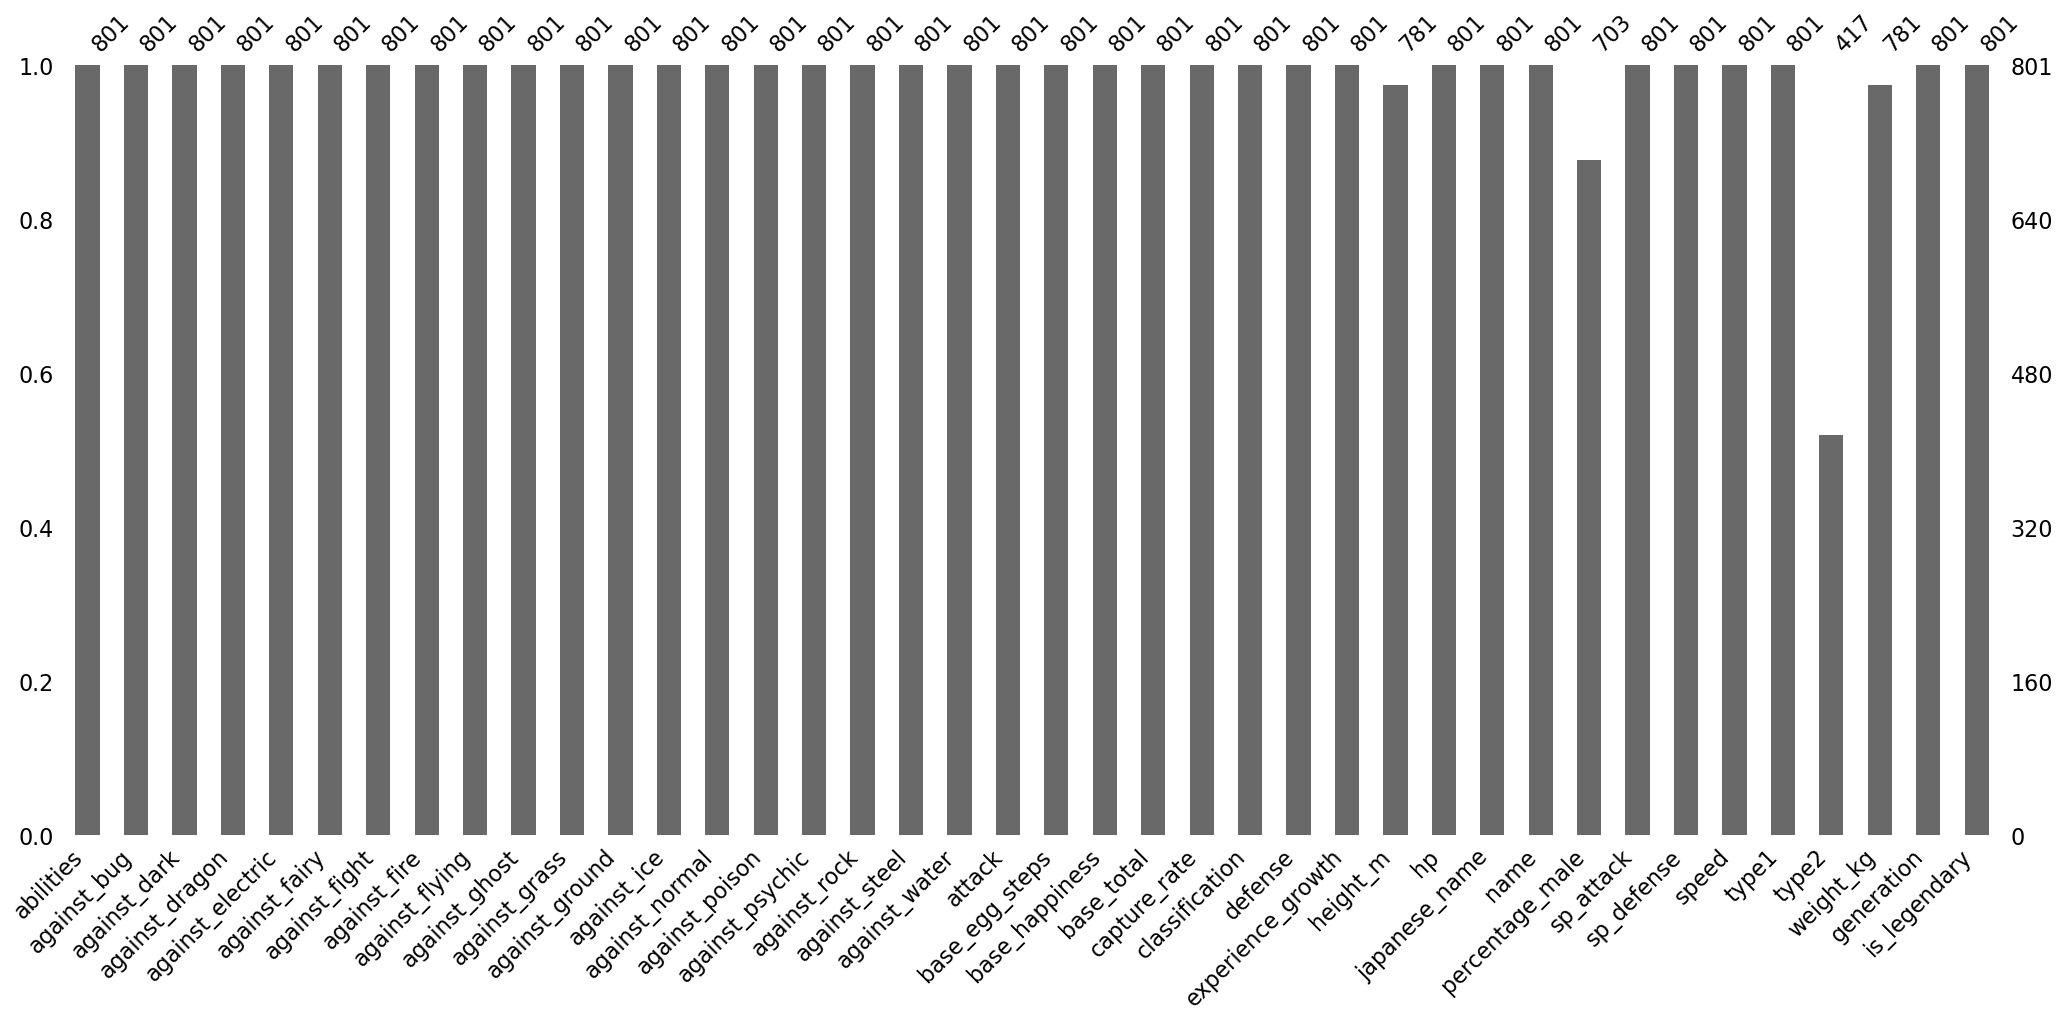

In [51]:
msno.bar(data)


In [52]:
# As we can see from the matrix chart below, the nulls are evenly spread out in type2 and percentage_male.

<Axes: >

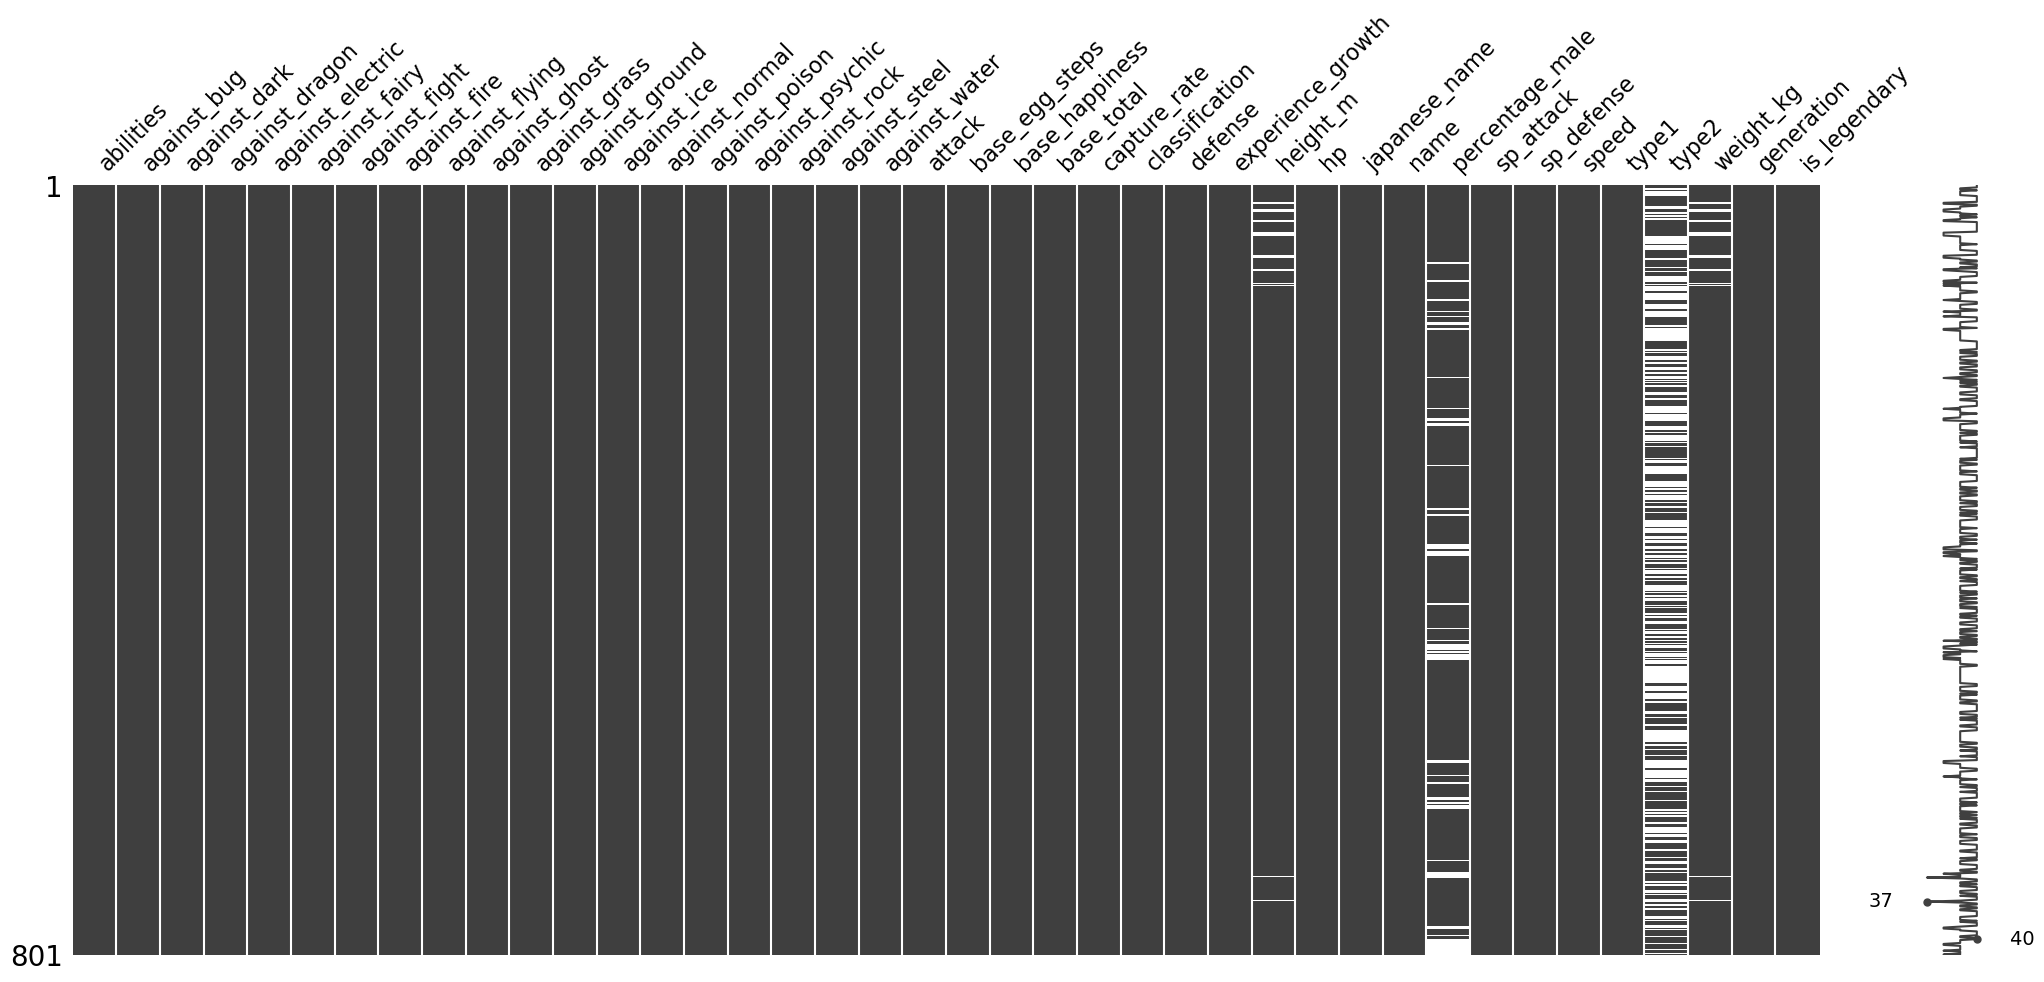

In [53]:
msno.matrix(data)

In [54]:
# As we can see from this heatmap, the nulls between weight_kg and height_m are perfectly correlated. That is something that needs to be taken into account when the variable is processed/cleaned.

<Axes: >

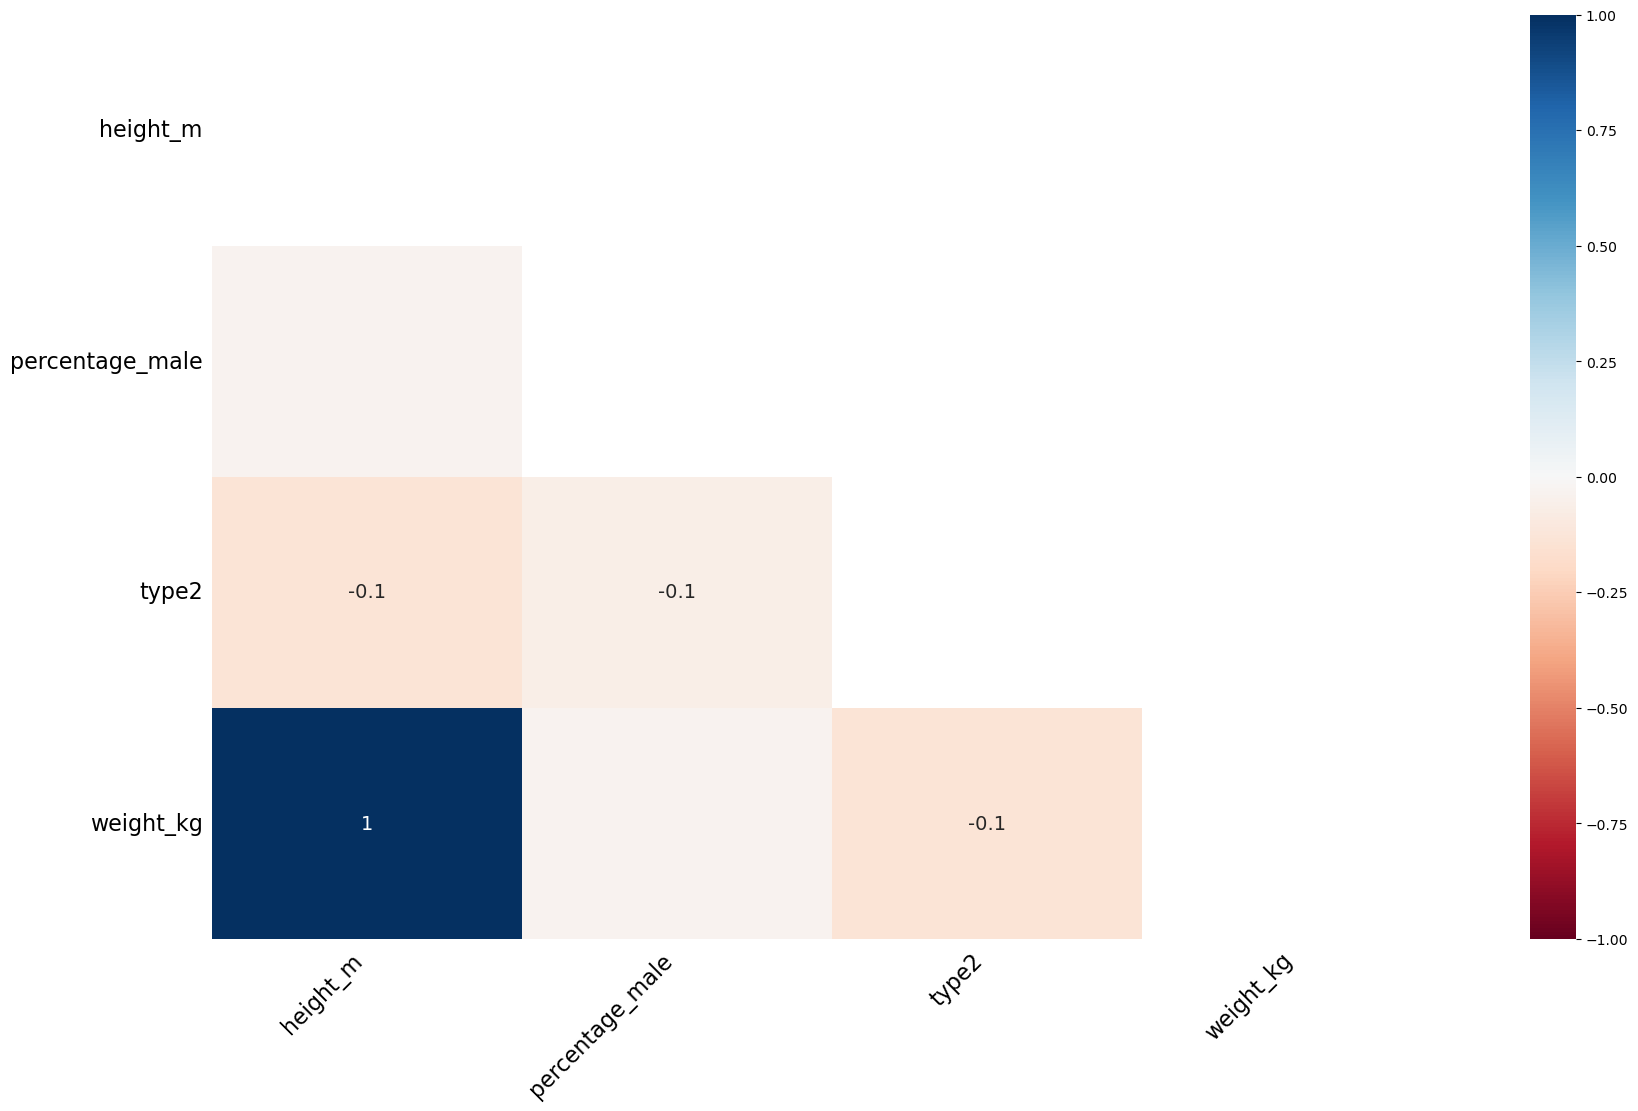

In [55]:
msno.heatmap(data) 

In [56]:
# Feature Engineering 

In [57]:
## percentage_male Variable

In [58]:
gender_unclean= data[['name', 'percentage_male']]
print(gender_unclean)

                        name  percentage_male
pokedex_number                               
1                  Bulbasaur             88.1
2                    Ivysaur             88.1
3                   Venusaur             88.1
4                 Charmander             88.1
5                 Charmeleon             88.1
6                  Charizard             88.1
7                   Squirtle             88.1
8                  Wartortle             88.1
9                  Blastoise             88.1
10                  Caterpie             50.0
11                   Metapod             50.0
12                Butterfree             50.0
13                    Weedle             50.0
14                    Kakuna             50.0
15                  Beedrill             50.0
16                    Pidgey             50.0
17                 Pidgeotto             50.0
18                   Pidgeot             50.0
19                   Rattata             50.0
20                  Raticate      

In [59]:
# Check if the 'percentage_male' column is 0 (indicating all Pokémon are female) by applying a mask
is_zero_mask = (data['percentage_male'] == 0)

# Select rows where 'percentage_male' is 0
entirely_female_pokemon= data[is_zero_mask]


In [60]:
# After further research, the digit '0' does not indicate a missing value -- it indicates that the population of the given pokemon is entirely female.This means what we truly should be looking at is how to handle the NaNs

In [61]:
print(entirely_female_pokemon[['name', 'percentage_male']]) #list of pokemon where the population is entirely female

                      name  percentage_male
pokedex_number                             
29                Nidoran♀              0.0
30                Nidorina              0.0
31               Nidoqueen              0.0
113                Chansey              0.0
115             Kangaskhan              0.0
124                   Jynx              0.0
238               Smoochum              0.0
241                Miltank              0.0
242                Blissey              0.0
314               Illumise              0.0
380                 Latias              0.0
413               Wormadam              0.0
416              Vespiquen              0.0
440                Happiny              0.0
478               Froslass              0.0
488              Cresselia              0.0
548                Petilil              0.0
549              Lilligant              0.0
629                Vullaby              0.0
630              Mandibuzz              0.0
669                Flabébé      

In [62]:
#pd.set_option('display.max_rows', None)  #to display all the rows and columns so I can verify as to whether all the pokemon in this list are genderless
#pd.set_option('display.max_columns', None)

In [63]:
#After manually checking all the pokemon in this list, it can be confirmed that all the pokemon with NaNs are indeed genderless. 

In [64]:
percentage_male_nan = data[data['percentage_male'].isnull()] 
print(percentage_male_nan[['name', 'percentage_male']])


                      name  percentage_male
pokedex_number                             
81               Magnemite              NaN
82                Magneton              NaN
100                Voltorb              NaN
101              Electrode              NaN
120                 Staryu              NaN
121                Starmie              NaN
132                  Ditto              NaN
137                Porygon              NaN
144               Articuno              NaN
145                 Zapdos              NaN
146                Moltres              NaN
150                 Mewtwo              NaN
151                    Mew              NaN
201                  Unown              NaN
233               Porygon2              NaN
243                 Raikou              NaN
244                  Entei              NaN
245                Suicune              NaN
249                  Lugia              NaN
250                  Ho-Oh              NaN
251                 Celebi      

In [65]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [66]:
(98/801)*100 #12.2% of all Pokemon are genderless, which is a significant amount, so dropping all of them doesn't seem like a good idea

12.234706616729088

In [67]:
# Thus, how to process this value depends on the requirements of the models that I choose to use, as it would impact the analysis. In this case, there is no numeric value that can accurately represent genderless pokemon from a scale of 0-100. Doing so will also cause the subsequent classifier model to interpret the variable as a continuous ordinal/numerical variable. Therfore, I have chosen to impute all NaNs as '0's, while also creating a separate binary feature named 'genderless'. That way, I would be able to retain this information without having to impute the NaNs with a numerical value. 

In [68]:
data['is_genderless']= data['percentage_male'].isnull().astype(int) # creating a new binary feature named 'is_genderless' consisting of a 0 or 1 (True/False)

In [69]:
print(data['is_genderless'].head()) #to see what it looks like

pokedex_number
1    0
2    0
3    0
4    0
5    0
Name: is_genderless, dtype: int32


In [70]:
data['percentage_male'].fillna(0, inplace=True) #filling all the NaNs in 'percentage_male' with 0, directly to the dataframe. Genderless pokemon are technically not male, and the separate binary feature expands on this further by specifying whether the pokemon is genderless or not. YAY to feature engineering!

In [71]:
pd.set_option('display.max_rows', None)  #to display all the rows and columns

In [72]:
print(data[['name', 'percentage_male', 'is_genderless']]) # see see lookie lookie

                        name  percentage_male  is_genderless
pokedex_number                                              
1                  Bulbasaur             88.1              0
2                    Ivysaur             88.1              0
3                   Venusaur             88.1              0
4                 Charmander             88.1              0
5                 Charmeleon             88.1              0
6                  Charizard             88.1              0
7                   Squirtle             88.1              0
8                  Wartortle             88.1              0
9                  Blastoise             88.1              0
10                  Caterpie             50.0              0
11                   Metapod             50.0              0
12                Butterfree             50.0              0
13                    Weedle             50.0              0
14                    Kakuna             50.0              0
15                  Beed

In [73]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [74]:
# weight_kg and _height_m variables

In [75]:
# I will look into these variables simultaneously as the nulls are perfectly correlated

In [76]:
data['weight_kg'].isna().sum()

20

In [77]:
data['height_m'].isna().sum()

20

In [78]:
#As the nulls are perfectly correlated, I would like to see if they belong to the same pokemon

In [79]:
both_nulls= data['weight_kg'].isnull() & data['height_m'].isnull()
pokemon_with_both_nulls= data[both_nulls]
print(pokemon_with_both_nulls[['name', 'weight_kg', 'height_m']])

                     name  weight_kg  height_m
pokedex_number                                
19                Rattata        NaN       NaN
20               Raticate        NaN       NaN
26                 Raichu        NaN       NaN
27              Sandshrew        NaN       NaN
28              Sandslash        NaN       NaN
37                 Vulpix        NaN       NaN
38              Ninetales        NaN       NaN
50                Diglett        NaN       NaN
51                Dugtrio        NaN       NaN
52                 Meowth        NaN       NaN
53                Persian        NaN       NaN
74                Geodude        NaN       NaN
75               Graveler        NaN       NaN
76                  Golem        NaN       NaN
88                 Grimer        NaN       NaN
89                    Muk        NaN       NaN
103             Exeggutor        NaN       NaN
105               Marowak        NaN       NaN
720                 Hoopa        NaN       NaN
745          

In [80]:
len(pokemon_with_both_nulls)

20

In [81]:
# The results confirm that the nulls are perfectly correlated -- because they belong to the same pokemon!!!!!!! As the Kaggle dataset was scrapped from serebii, I can access the dataset manually to check if there is indeed no height or weight data associated to these pokemon.
#After checking serebii, it seems that there is indeed height and weight data associated to each of the listedpokemon. Thus, instead of choosing to impute it using the mean (whcih I would normally do), I will extract the missing values from serebii for the sake of accuracy. I will also do this manually as it would be faster to do so considering the considerably few number of rows involved versus the complexity of the site's html code (it doesn't make sense time wise). However, I will webscrape the site later on for images.

In [82]:
#Accessed from https://www.serebii.net/pokedex-sm/{}.shtml
#Compiling all the replacement values in a list

replacement_values= replacement_values = {
    "Rattata": {'weight_kg': 3.5, 'height_m': 0.3},
    "Raticate": {'weight_kg': 18.5, 'height_m': 0.7},
    "Raichu": {'weight_kg': 30.0, 'height_m': 0.8},
    "Sandshrew": {'weight_kg': 12.0, 'height_m': 0.6},
    "Sandslash": {'weight_kg': 29.5, 'height_m': 1.0},
    "Vulpix": {'weight_kg': 9.9, 'height_m': 0.6},
    "Ninetales": {'weight_kg': 19.9, 'height_m': 1.1},
    "Diglett": {'weight_kg': 0.8, 'height_m': 0.2},
    "Dugtrio": {'weight_kg': 33.3, 'height_m': 0.7},
    "Meowth": {'weight_kg': 4.2, 'height_m': 0.4},
    "Persian": {'weight_kg': 32.0, 'height_m': 1.0},
    "Geodude": {'weight_kg': 20.0, 'height_m': 0.4},
    "Graveler": {'weight_kg': 105.0, 'height_m': 1.0},
    "Golem": {'weight_kg': 300.0, 'height_m': 1.4},
    "Grimer": {'weight_kg': 30.0, 'height_m': 0.7},
    "Muk": {'weight_kg': 30.0, 'height_m': 1.0},
    "Exeggutor": {'weight_kg': 120.0, 'height_m': 2.0},
    "Marowak": {'weight_kg': 45.0, 'height_m': 1.0},
    "Hoopa": {'weight_kg': 9.0, 'height_m': 0.5},
    "Lycanroc": {'weight_kg': 25.0, 'height_m': 0.8}, }

In [83]:
for index, row in data.iterrows():  #iterrows is a loop function that iterates through each row in the dataframe, which in this case is 'data'
    name= row['name']
    if name in replacement_values:
        for col, value in replacement_values[name].items():
            if pd.isna(row[col]):
                data.loc[index,col]=value
            
    

In [84]:
#checking if the missing values have been imputed...success!

print(data.loc[data['name'].isin([ "Rattata", "Raticate", "Raichu", "Sandshrew", "Sandslash", "Vulpix", "Ninetales", "Diglett", "Dugtrio", "Meowth", "Persian", "Geodude",
"Graveler", "Golem", "Grimer", "Muk", "Exeggutor", "Marowak", "Hoopa", "Lycanroc"]), ['name', 'weight_kg', 'height_m']])  


                     name  weight_kg  height_m
pokedex_number                                
19                Rattata        3.5       0.3
20               Raticate       18.5       0.7
26                 Raichu       30.0       0.8
27              Sandshrew       12.0       0.6
28              Sandslash       29.5       1.0
37                 Vulpix        9.9       0.6
38              Ninetales       19.9       1.1
50                Diglett        0.8       0.2
51                Dugtrio       33.3       0.7
52                 Meowth        4.2       0.4
53                Persian       32.0       1.0
74                Geodude       20.0       0.4
75               Graveler      105.0       1.0
76                  Golem      300.0       1.4
88                 Grimer       30.0       0.7
89                    Muk       30.0       1.0
103             Exeggutor      120.0       2.0
105               Marowak       45.0       1.0
720                 Hoopa        9.0       0.5
745          

In [85]:
# type_2 variable

In [86]:
type_2_nulls= data['type2'].isnull()

In [87]:
type2nulls= data[type_2_nulls]

In [88]:
pd.set_option('display.max_rows', None)  #to display all the rows and columns

In [89]:
print(type2nulls[['name', 'type1', 'type2']])

                      name     type1 type2
pokedex_number                            
4               Charmander      fire   NaN
5               Charmeleon      fire   NaN
7                 Squirtle     water   NaN
8                Wartortle     water   NaN
9                Blastoise     water   NaN
10                Caterpie       bug   NaN
11                 Metapod       bug   NaN
23                   Ekans    poison   NaN
24                   Arbok    poison   NaN
25                 Pikachu  electric   NaN
29                Nidoran♀    poison   NaN
30                Nidorina    poison   NaN
32                Nidoran♂    poison   NaN
33                Nidorino    poison   NaN
35                Clefairy     fairy   NaN
36                Clefable     fairy   NaN
54                 Psyduck     water   NaN
55                 Golduck     water   NaN
56                  Mankey  fighting   NaN
57                Primeape  fighting   NaN
58               Growlithe      fire   NaN
59         

In [90]:
both_type_nulls= data['type1'].isnull() & data['type2'].isnull()
bothtypenulls=data[both_type_nulls]

In [91]:
print(bothtypenulls[['name', 'type1', 'type2']]) # there are no pokemon where both types are missing

Empty DataFrame
Columns: [name, type1, type2]
Index: []


In [92]:
# After further research, it appears that pokemon with only one type - in this case, type1-, indicates that the pokemon is of one pure elemental type. For example, Charmander is a pure fire pokemon, and hence has only one type, which is fire. In other words, the NaNs in type2 should be imputed with 'None' as opposed to NaN.

In [93]:
for index, row in data.iterrows():
    if pd.isna(row['type2']):
        data.loc[index, 'type2'] = 'None'

In [94]:
row_4_subset = data.loc[4, ['name', 'type1', 'type2']]
print(row_4_subset) #this shows that the NaNs have been correctly imputed with 'None'!

name     Charmander
type1          fire
type2          None
Name: 4, dtype: object


In [95]:
data.to_csv('pokemon_rarity_analysis.csv', index=False)

<h2 style="font-family: 'Helvetica'; font-size: 30px; color: #89CFF0;"> 3 🧼 Further Cleaning and Feature Selection 🧼
<p style="color: #93E9BE; font-family: 'Helvetica', cursive;"> 🫧 Using domain knowledge, correlation analysis, VIF and feature importance 🫧 </p></h2>
 

<img src="https://i.kym-cdn.com/photos/images/newsfeed/001/063/215/6d9.gif" alt= " We need this to be even cleaner yall">

In [96]:
# Correlation Heatmap and Variance Inflation Factor

In [97]:
pokemon_mapping = data['name'].to_dict()
#print(pokemon_mapping)  

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [99]:
#dropped_columns= data[['base_egg_steps', 'name', 'japanese_name']]  # to be done all at once at the end
#data.drop(['base_egg_steps', 'name', 'japanese_name'], axis=1, inplace=True)

In [100]:
# Correlation Heatmap and Variance Inflation Factor

In [101]:
#Encoding the categorical variables for correlation analysis
encoded_type1 = pd.get_dummies(data['type1'], prefix='type1')
encoded_type2 = pd.get_dummies(data['type2'], prefix='type2')


In [102]:
## Concatenating the encoded variables with other numerical variables to form a dataframe called encoded_data
encoded_data = pd.concat([encoded_type1, encoded_type2, data.select_dtypes(include='number')], axis=1)

In [103]:
#Correlation heatmap

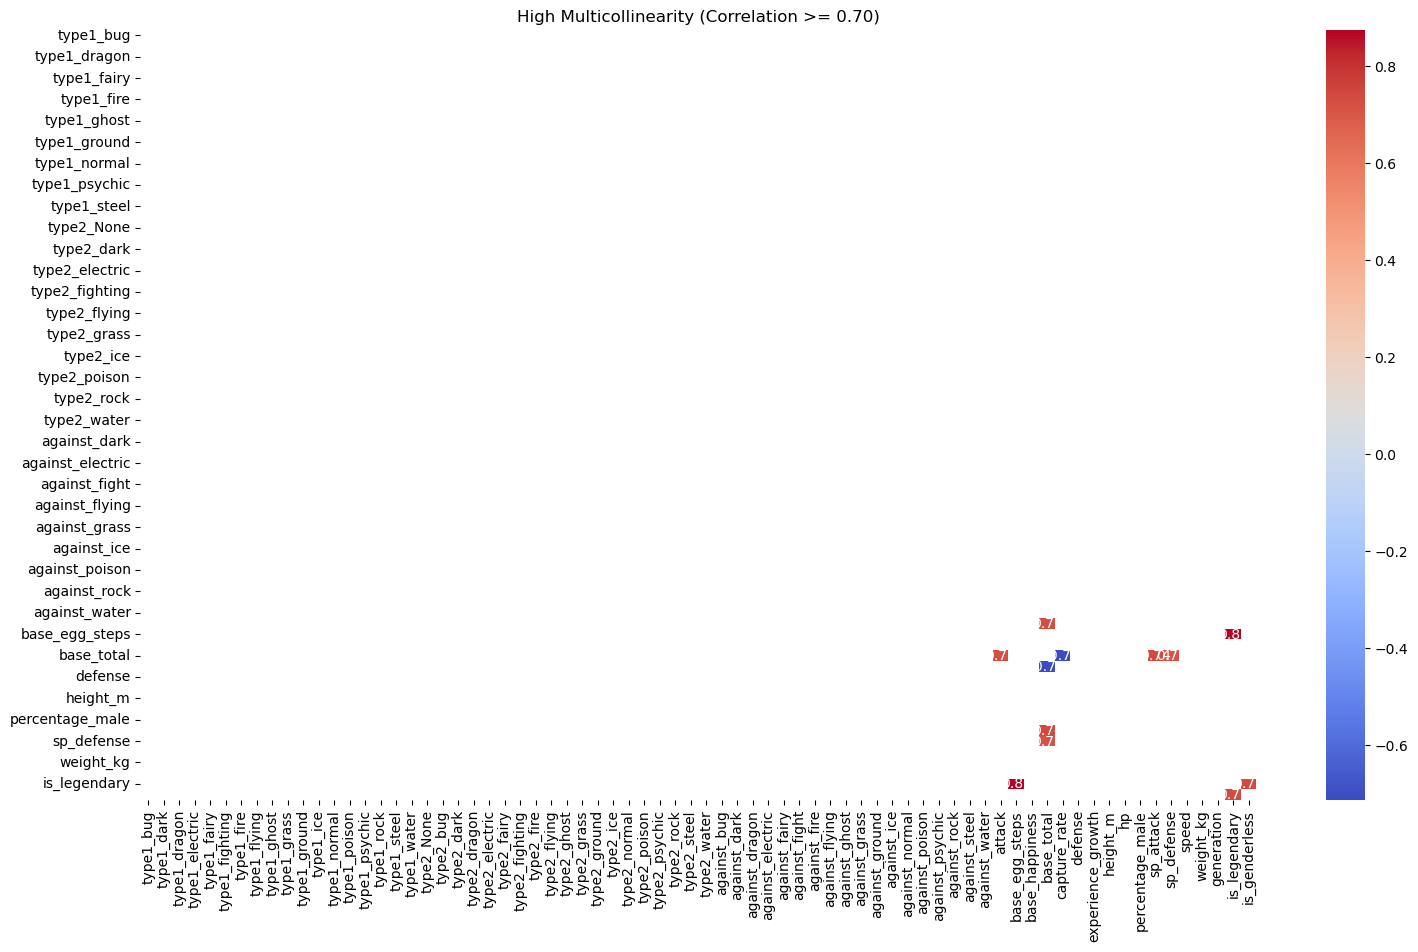

In [104]:
corr_matrix = encoded_data.corr()

# Set a threshold for high multicollinearity 
threshold = 0.7

# Create a mask to filter out lower correlated values
mask = abs(corr_matrix) >= threshold

# Set the diagonal elements to False to avoid showing self-correlations
np.fill_diagonal(mask.values, False)

# Plot the filtered correlation matrix as a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix[mask], cmap='coolwarm', annot=True, fmt='.2f')
plt.title('High Multicollinearity (Correlation >= {:.2f})'.format(threshold))
plt.show()

The regular correlation heatmap doesnt display the correlations between many variables that clearly (as seen below). To address this issue, I have chosen to use the corr_simple function with a sigmoid/threshold level equal to or more than 0.7. The corr_simple function calculates and identifies significant correlations, which reduces clutter in the resulting visualization. I adapted the code below from Catherine Williams, who originally wrote it for R: [article here](https://towardsdatascience.com/how-to-create-a-correlation-matrix-with-too-many-variables-309cc0c0a57)

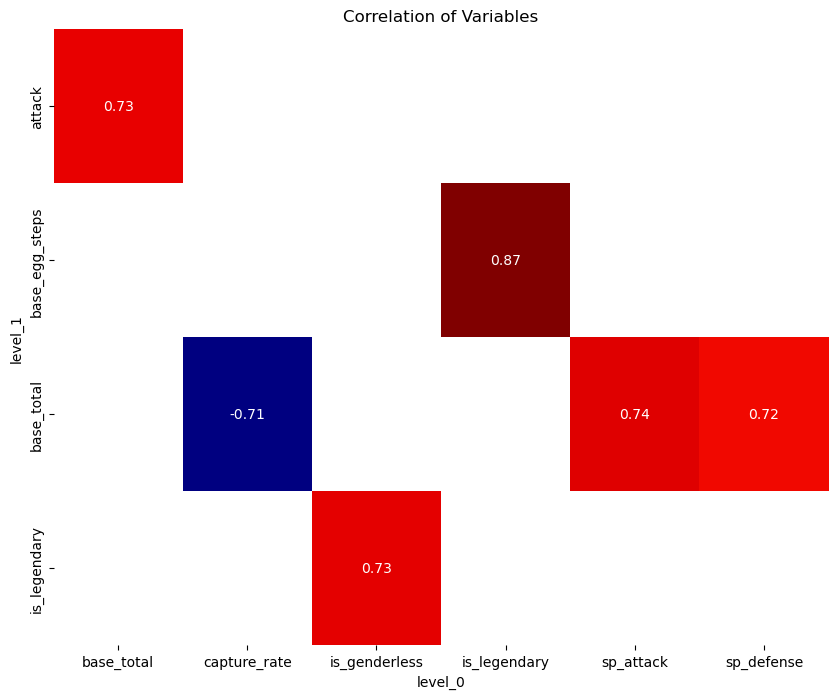

            level_0         level_1         0
5096   is_legendary  base_egg_steps  0.873488
4738      sp_attack      base_total  0.741120
5182  is_genderless    is_legendary  0.734375
4231     base_total          attack  0.730134
4810     sp_defense      base_total  0.717434
4306   capture_rate      base_total -0.712275


In [105]:
def corr_simple(data, sig=0.7):

    # Run a correlation and drop the insignificant ones
    corr = encoded_data.corr()
    
    # Prepare to drop duplicates and correlations of 1
    corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    
    # Drop perfect correlations
    corr[corr == 1] = np.nan
    
    # Remove the NA values from above
    corr = corr.unstack().reset_index()
    corr = corr.dropna(subset=[0])
    
    # Select significant values
    corr = corr[abs(corr[0]) > sig]
    
    # Sort by highest correlation
    corr = corr.sort_values(by=0, ascending=False)
    
    # Plot correlations visually
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr.pivot(index='level_1', columns='level_0', values=0),
                annot=True, cmap='jet', fmt='.2f', cbar=False)
    plt.title('Correlation of Variables')
    plt.show()
    
    return corr

# A table to complement the heatmap:
resulting_corr_table = corr_simple(data)
print(resulting_corr_table)

Based on the correlation heatmap above, we can see that there is evidence of multicollinearity between **sp_attack**, **sp_defense**,**attack** with **base_total** (sigmoid/threshold <=0.7).

**is_genderless** has a strong correlation with is_legendary, but since is_genderless is an explanatory/independent variable and is_legendary is a target/dependent variable, this does not constitute multicollinearity (multicollinearity is a strong correlation between two or more independent variables). 

We can further confirm their impact on the model using a Variance Inflation Factor (VIF) Analysis. 

In [106]:
# Correlations between Numerical Features and Legendary Status

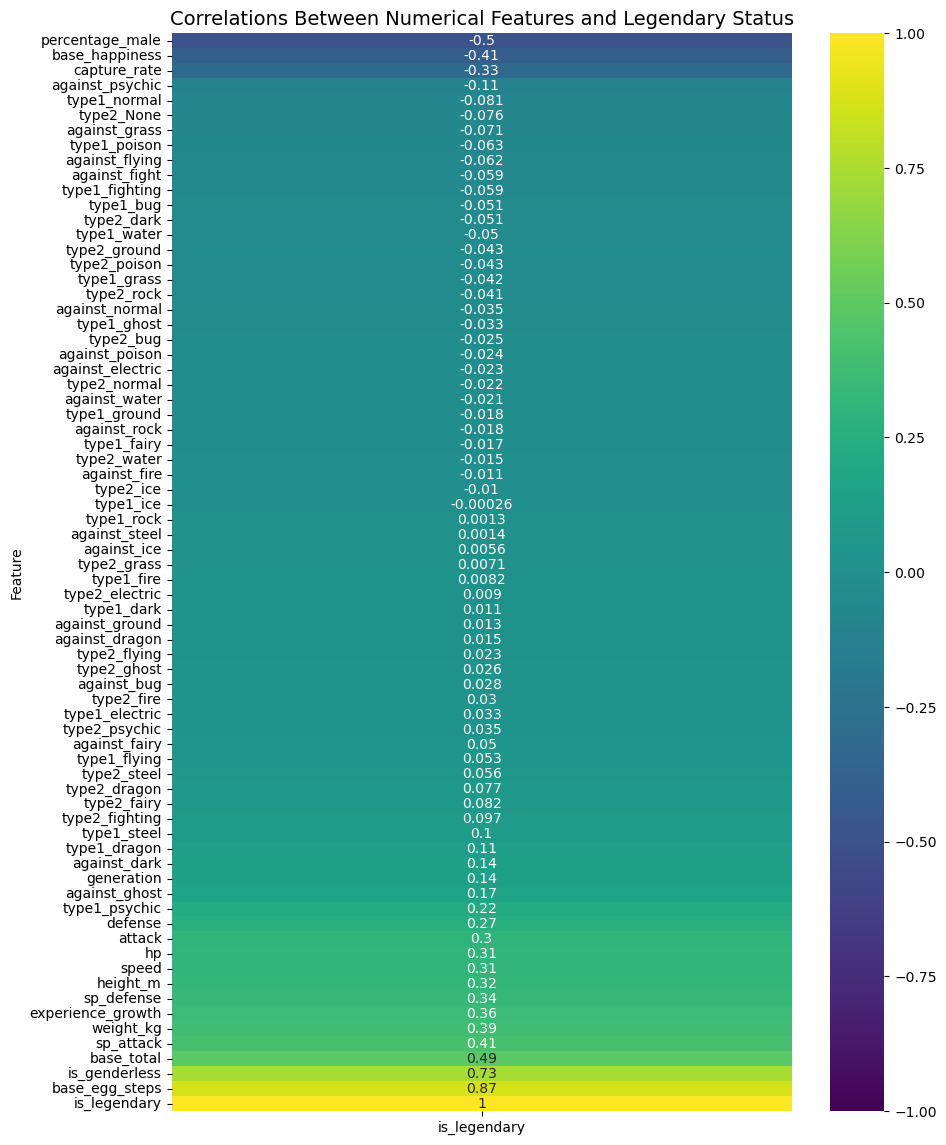

In [107]:
correlation_matrix = encoded_data.corr()[['is_legendary']].sort_values('is_legendary')
plt.figure(figsize=(10, 14))
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Legendary Status', fontdict={'fontsize':14})
plt.ylabel('Feature');



In [108]:
#The results confirm what we've already seen in the heatmap above, especially with regads to is_legendary

In [109]:
#Variance Inflation Factor

In [110]:
#Using VIF, we can measure the level of collinearity between variables. This is particularly pertinent as later on I will be performing a logistic regression as as part of my binary classification model building

In [111]:
# Step 1: Select all predictor variables (excluding the target variable) for VIF calculation
predictor_variables = encoded_data.drop(columns=['is_legendary'])  # 'is_legendary' is the target variable

# Step 2: Add a constant term to the predictor variables
predictor_variables = sm.add_constant(predictor_variables)

# Step 3: Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = predictor_variables.columns
vif["VIF"] = [variance_inflation_factor(predictor_variables.values, i) for i in range(predictor_variables.shape[1])]

vif

,Variable,VIF
0,const,0.000000e+00
1,type1_bug,inf
2,type1_dark,inf
3,type1_dragon,inf
4,type1_electric,inf
5,type1_fairy,inf
6,type1_fighting,inf
7,type1_fire,inf
8,type1_flying,9.007199e+15
9,type1_ghost,inf


**type1_() and type2_()** encoded variables have extremely high VIF values of inf(infinity), which indicate perfect collinearity. To examine the effects of the type_? variables on the VIF, let's first drop all encoded type2 variables and then rerun the VIF analysis. Note: **const** is an intercept term that is necessary for the VIF calculation, and not an actual variable.

In [112]:
# Step 1: Select all predictor variables (excluding the target variable and "type2_" columns) for VIF calculation
predictor_variables = encoded_data.drop(columns=['is_legendary', *encoded_data.filter(like='type2_').columns])

# Step 2: Add a constant term to the predictor variables (if needed for your specific use case)
# predictor_variables = sm.add_constant(predictor_variables)

# Step 3: Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = predictor_variables.columns
vif["VIF"] = [variance_inflation_factor(predictor_variables.values, i) for i in range(predictor_variables.shape[1])]

# Step 4: Display the table with VIF values
print(vif)

             Variable        VIF
0           type1_bug  63.961603
1          type1_dark  23.740760
2        type1_dragon  25.915293
3      type1_electric  34.876063
4         type1_fairy  15.582224
5      type1_fighting  26.398785
6          type1_fire  45.471177
7        type1_flying   3.809306
8         type1_ghost  19.583977
9         type1_grass  69.224574
10       type1_ground  28.021126
11          type1_ice  24.084049
12       type1_normal  87.168249
13       type1_poison  28.675335
14      type1_psychic  51.710545
15         type1_rock  40.982493
16        type1_steel  18.718590
17        type1_water  96.162909
18        against_bug   5.606412
19       against_dark  17.806473
20     against_dragon   9.961048
21   against_electric   5.758746
22      against_fairy   7.593499
23      against_fight   6.117509
24       against_fire   8.604665
25     against_flying   8.107154
26      against_ghost  26.874753
27      against_grass   4.820987
28     against_ground   6.490553
29        

In [113]:
# Once again, the degree of collinearity among variables seems to have gone down, but still remains high among these variables: sp_attack', 'sp_defense', 'speed', 'defense', and 'attack'. From the perspective of domain knowledge alone, base_total serves as a representation of all these variables so we can do without them. Let's drop all of them and rerun the VIF analysis again.

In [114]:
# Step 1: Select all predictor variables (excluding the target variable) for VIF calculation
predictor_variables = encoded_data.drop(columns=['is_legendary'])  # 'is_legendary' is the target variable

# Step 2: Drop the 'type1_' and 'type2_' variables
type1_columns = [col for col in predictor_variables.columns if col.startswith('type1_')]
type2_columns = [col for col in predictor_variables.columns if col.startswith('type2_')]
predictor_variables = predictor_variables.drop(columns=type1_columns + type2_columns)

# Step 3: Add a constant term to the predictor variables
predictor_variables = sm.add_constant(predictor_variables)

# Step 4: Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = predictor_variables.columns
vif["VIF"] = [variance_inflation_factor(predictor_variables.values, i) for i in range(predictor_variables.shape[1])]

# Step 5: Display the table with VIF values
print(vif)

             Variable         VIF
0               const  435.954392
1         against_bug    3.829944
2        against_dark    5.068283
3      against_dragon    5.598632
4    against_electric    4.070857
5       against_fairy    4.210338
6       against_fight    4.381383
7        against_fire    5.626445
8      against_flying    4.996092
9       against_ghost    4.497346
10      against_grass    2.254786
11     against_ground    4.908449
12        against_ice    2.744434
13     against_normal    2.698507
14     against_poison    4.176391
15    against_psychic    4.324648
16       against_rock    4.215901
17      against_steel    2.422797
18      against_water    3.620668
19             attack         inf
20     base_egg_steps    2.747927
21     base_happiness    1.733569
22         base_total         inf
23       capture_rate    2.285400
24            defense         inf
25  experience_growth    1.287435
26           height_m    2.084226
27                 hp         inf
28    percenta

In [115]:
# Now, all variables seem to have VIF scores within the acceptable limit (VIF<5). There are some variables with VIF scores marginally above 5, but deleting just one of a set (for example, against_dragon or again_fire from the against_() set), would affect the interpretability of the remaining variables. I'll need to see more evidence before I'm willing to drop them.

In [116]:
# Step 1: Select all predictor variables (excluding the target variable) for VIF calculation
predictor_variables = encoded_data.drop(columns=['is_legendary'])  # 'is_legendary' is the target variable

# Step 2: Drop the 'type1_' and 'type2_' variables
type1_columns = [col for col in predictor_variables.columns if col.startswith('type1_')]
type2_columns = [col for col in predictor_variables.columns if col.startswith('type2_')]
predictor_variables = predictor_variables.drop(columns=type1_columns + type2_columns)

# Step 3: Drop additional variables 'sp_attack', 'sp_defense', 'speed', 'defense', and 'attack'
predictor_variables = predictor_variables.drop(columns=['sp_attack', 'sp_defense', 'speed', 'defense', 'attack'])

# Step 4: Add a constant term to the predictor variables
predictor_variables = sm.add_constant(predictor_variables)

# Step 5: Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = predictor_variables.columns
vif["VIF"] = [variance_inflation_factor(predictor_variables.values, i) for i in range(predictor_variables.shape[1])]

# Step 6: Display the table with VIF values
print(vif)


             Variable         VIF
0               const  432.238969
1         against_bug    3.791868
2        against_dark    4.966388
3      against_dragon    5.465743
4    against_electric    4.000522
5       against_fairy    4.138769
6       against_fight    4.349238
7        against_fire    5.499595
8      against_flying    4.905507
9       against_ghost    4.441880
10      against_grass    2.183333
11     against_ground    4.756839
12        against_ice    2.672032
13     against_normal    2.620034
14     against_poison    4.078850
15    against_psychic    4.268641
16       against_rock    3.980861
17      against_steel    2.365146
18      against_water    3.506147
19     base_egg_steps    2.740824
20     base_happiness    1.720574
21         base_total    3.118121
22       capture_rate    2.267305
23  experience_growth    1.271994
24           height_m    2.078829
25                 hp    2.078951
26    percentage_male    2.313043
27          weight_kg    2.052670
28         gen

In [117]:
# Now, all variables seem to have VIF scores within the acceptable limit (VIF<5). There are some variables with VIF scores marginally above 5, but deleting just one of a set (for example, against_dragon or again_fire from the against_() set), would affect the interpretability of the remaining variables. I'll need to see more evidence before I'm willing to drop them.

In [118]:
# Summary of Correlation and VIF analysis



| Group 1         | Group 2         | Correlation Value |
|-----------------|-----------------|-------------------|
| against_dark    | against_psychic | 0.538784          |
| against_dragon  | type1_dragon    | 0.545864          |
| against_flying  | against_fire    | 0.528127          |
| against_ghost   | against_dark    | 0.672337          |
| against_ghost   | against_fight   | -0.546982         |
| against_ghost   | type1_normal    | -0.685760         |
| against_grass   | type1_water     | 0.535366          |
| against_ground  | type2_flying    | -0.545502         |
| against_poison  | type1_grass     | 0.520960          |
| against_rock    | type2_flying    | 0.594236          |
| against_electric| type1_water     | 0.516257          |
| base_happiness  | base_egg_steps  | -0.524551         |
| base_total      | attack          | 0.730134          |
| base_total      | defense         | 0.629620          |
| base_total      | hp              | 0.620624          |
| base_total      | sp_attack       | 0.741120          |
| base_total      | sp_defense      | 0.717434          |
| capture_rate    | base_total      | -0.712275         |
| is_genderless   | base_egg_steps  | 0.681136          |         |
| is_genderless   | percentage_male | -0.689832         |
| sp_attack       | capture_rate    | -0.520682         |
| sp_defense      | capture_rate    | -0.522616         |
| sp_defense      | defense         | 0.526348          |
| sp_defense      | sp_attack       | 0.511496          |
| speed           | base_total      | 0.547666          |
| weight_kg       | height_m        | 0.626516          |




| Variable         | Correlation with "is_legendary" |
|------------------|---------------------------------|
| base_total       | 0.734375                        |
| is_genderless    | 0.734375                        |
| attack           | 0.730134                        |
| sp_attack        | 0.741120                        |
| sp_defense       | 0.717434                        |
| height_m         | 0.533655                        |
| capture_rate     | -0.522616                       |
| percentage_male  | -0.689832                       |
| base_happiness   | -0.524551                       |

These variables have correlations with the "is_legendary" target variable, which indicates their potential importance in distinguishing legendary Pokémon from non-legendary ones. Positive correlations suggest that the variables increase with the likelihood of being legendary, while negative correlations suggest that the variables decrease with the likelihood of being legendary.

In [119]:
# Dropping columns based on domain knowledge



| **Column Name**       | **Description**                                                 |
|-----------------------|-----------------------------------------------------------------|
| name                  | The English name of the Pokemon                                |
| japanese_name         | The Original Japanese name of the Pokemon                      |
| pokedex_number        | The entry number of the Pokemon in the National Pokedex        |
| percentage_male       | The percentage of the species that are male. Blank if the Pokemon is genderless. |
| type1                 | The Primary Type of the Pokemon                                 |
| type2                 | The Secondary Type of the Pokemon                               |
| classification        | The Classification of the Pokemon as described by the Sun and Moon Pokedex |
| height_m              | Height of the Pokemon in metres                                 |
| weight_kg             | The Weight of the Pokemon in kilograms                          |
| capture_rate          | Capture Rate of the Pokemon                                     |
| base_egg_steps        | The number of steps required to hatch an egg of the Pokemon     |
| abilities             | A stringified list of abilities that the Pokemon is capable of having |
| experience_growth     | The Experience Growth of the Pokemon                            |
| base_happiness        | Base Happiness of the Pokemon                                   |
| against_?             | Eighteen features that denote the amount of damage taken against an attack of a particular type |
| hp                    | The Base HP of the Pokemon                                      |
| attack                | The Base Attack of the Pokemon                                  |
| defense               | The Base Defense of the Pokemon                                 |
| sp_attack             | The Base Special Attack of the Pokemon                          |
| sp_defense            | The Base Special Defense of the Pokemon                         |
| speed                 | The Base Speed of the Pokemon                                   |
| generation            | The numbered generation which the Pokemon was first introduced  |
| is_legendary          | Denotes if the Pokemon is legendary                             |



**base_egg_steps**: I will be dropping this column as legendary pokemon are generally unable to breed.

**name**: Names are not essential to model training and development. However, I will create a dictionary that maps the pokedex_number/index to the pokemon name to be used in further projects.

**japanese_name** : Names are not essential to model training and development.
    
**classification** : There are 588 unique, **descriptive/nominal** classifications (etc. Seed Pokemon, Dog Pokemon) and there are only 801 pokemon. This means there is unlikely any value in comparison.
    
**abilties**: String descriptions of abilities. It can be dropped for the same reason as **classification**.

**base_happiness**: a rather specific statistic, not very important in the context of the game



In [120]:
num_classification= data['classification'].nunique()
print(num_classification)

588


In [121]:
dropped_columns = data[[ 'speed','defense','attack', 'sp_attack', 'sp_defense', 'type1', 'type2', 'base_egg_steps', 'name', 'japanese_name', 'abilities', 'classification']] #to be done all at once at the end because I can only do it once
data.drop(['speed','defense','attack', 'sp_attack', 'sp_defense', 'type1', 'type2', 'base_egg_steps', 'name', 'japanese_name', 'abilities', 'classification'], axis=1, inplace=True) 

In [122]:
data.info() # confirming that they have been dropped from the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [123]:
#Variable Distribution Visualizer

In [124]:
#Outliers - left intact as they represent rare and extraordinary attributes

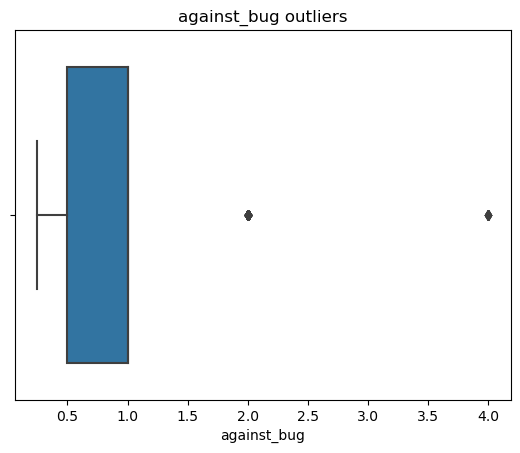

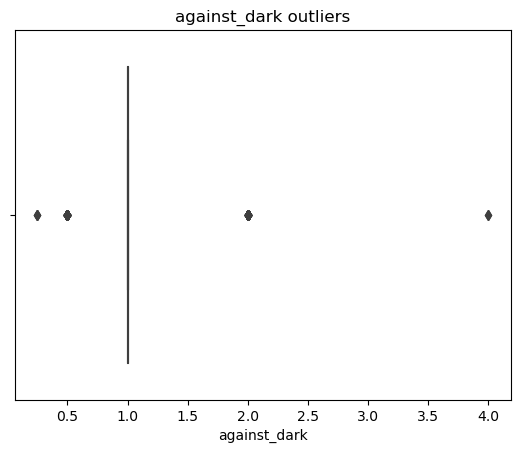

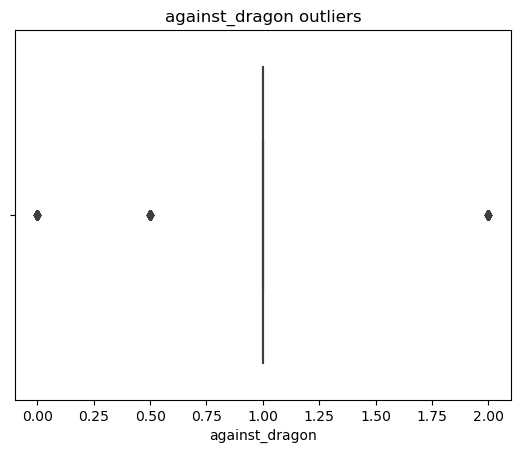

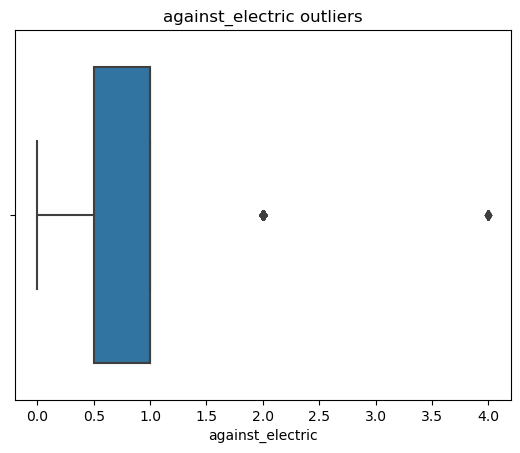

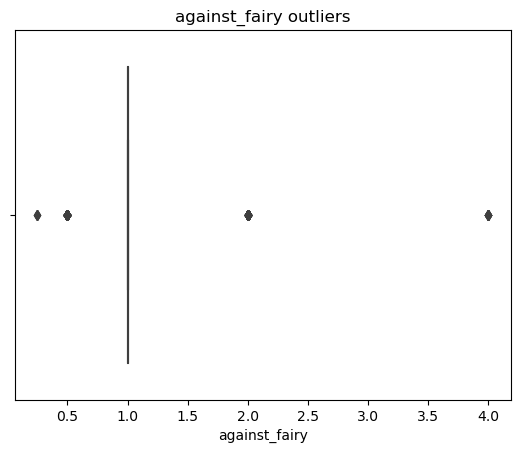

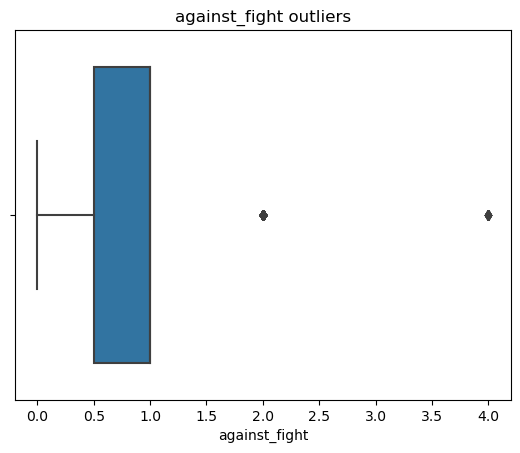

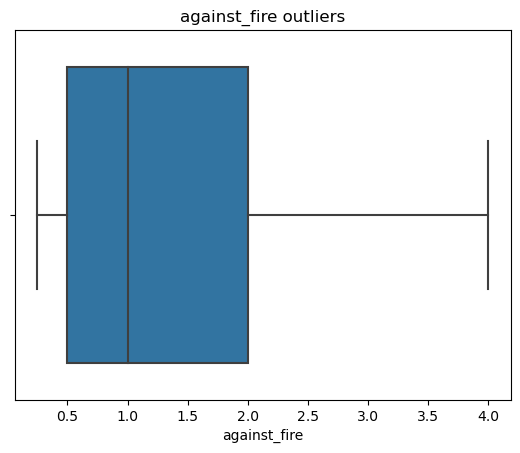

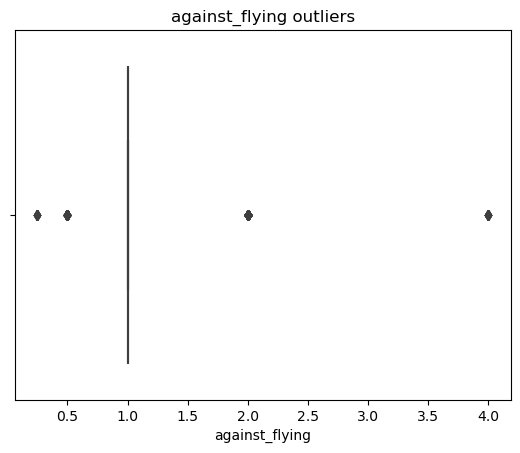

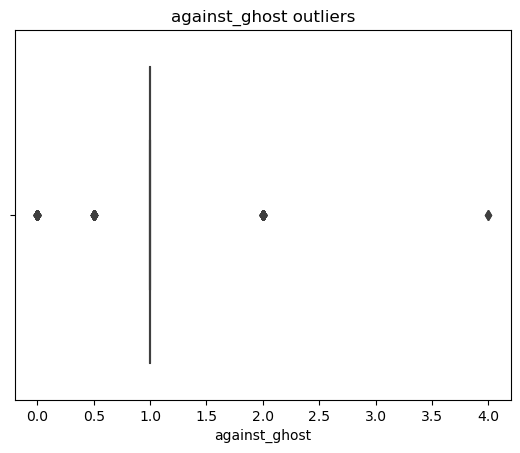

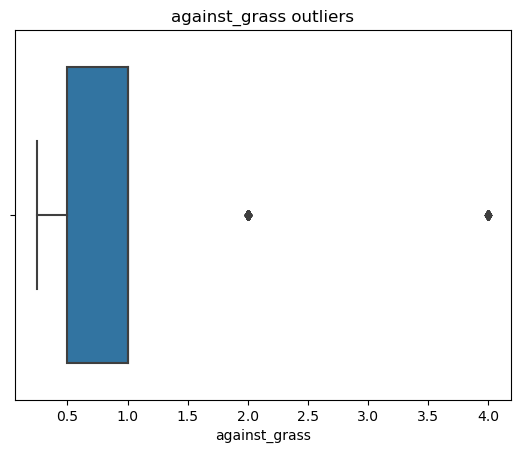

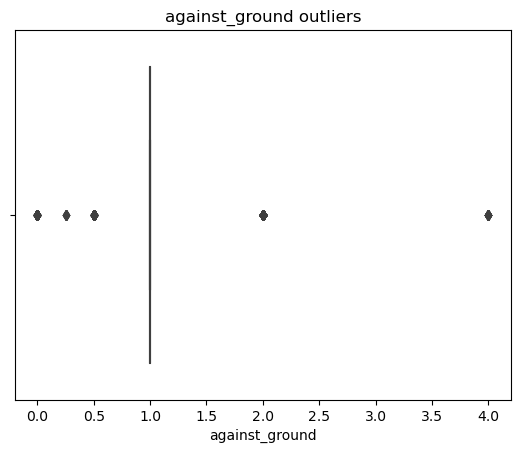

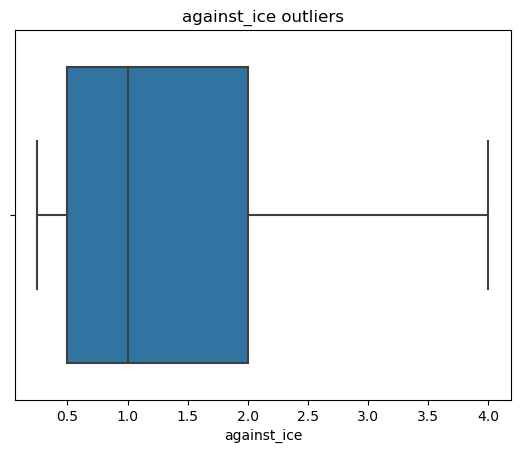

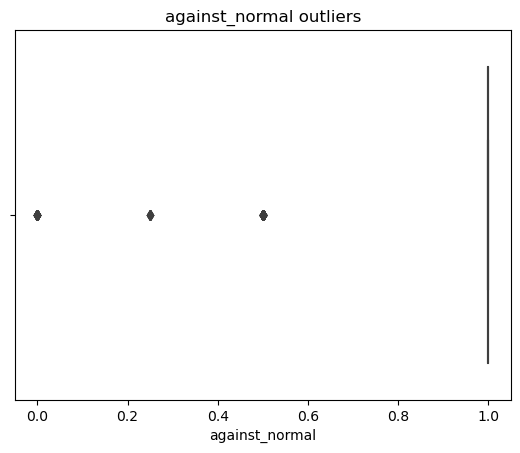

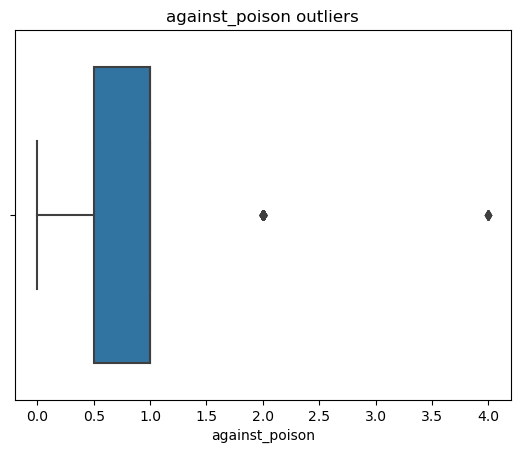

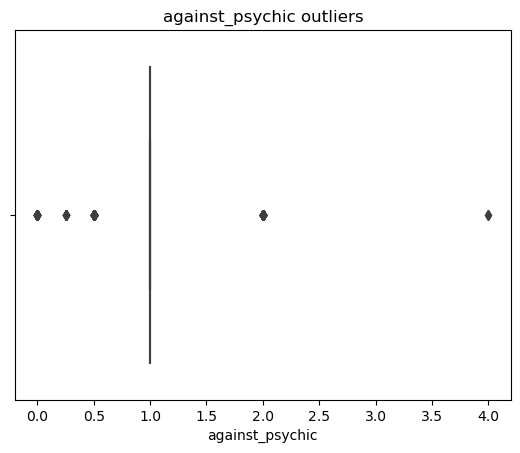

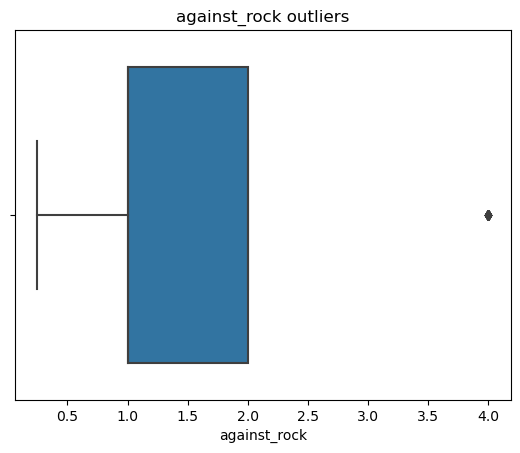

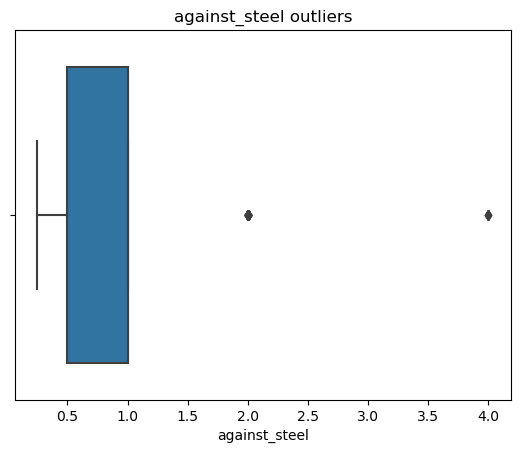

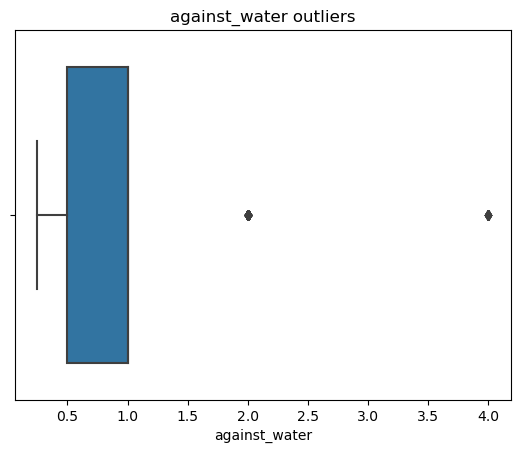

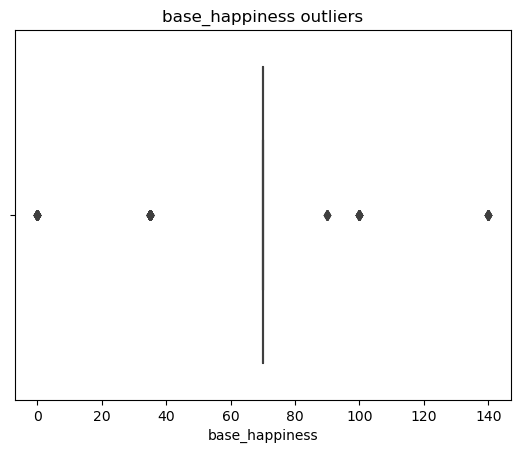

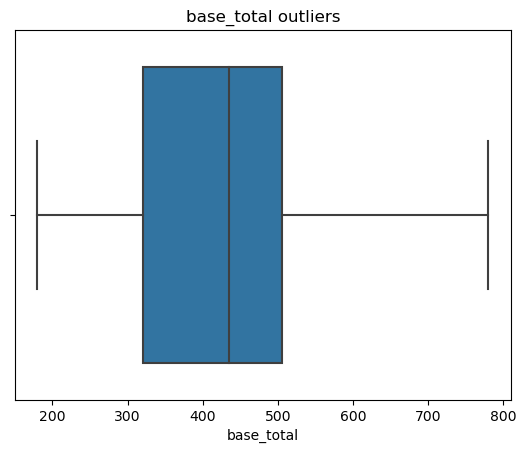

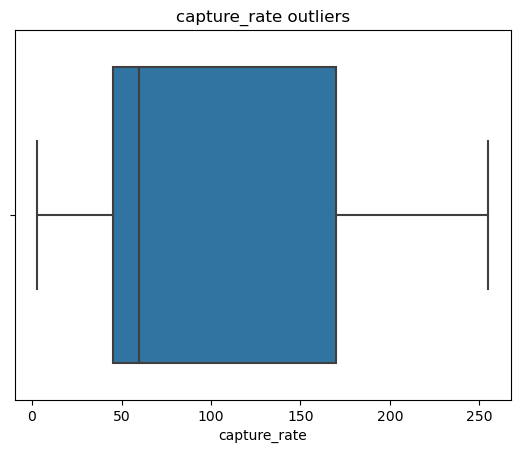

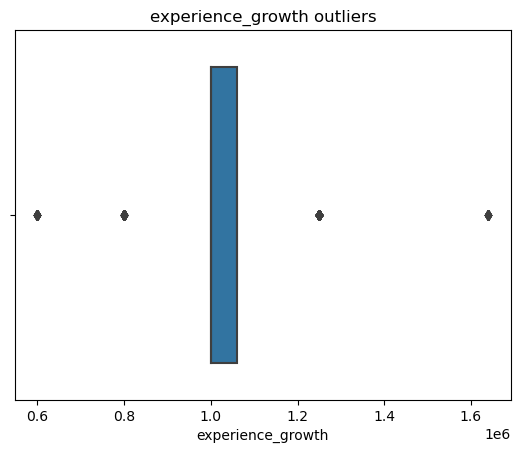

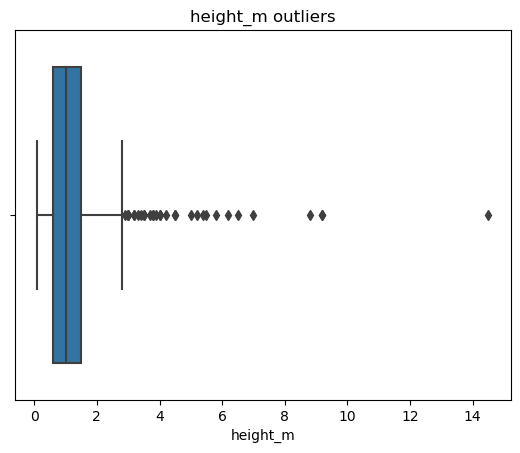

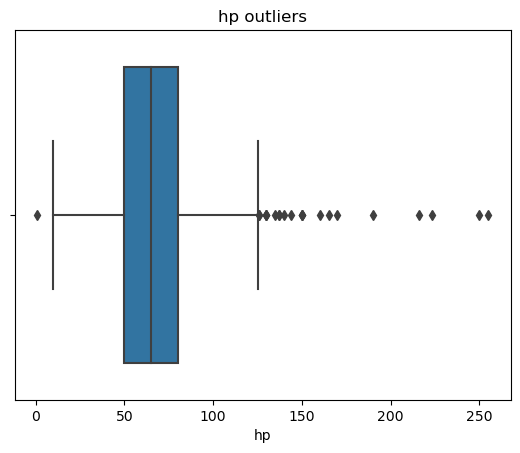

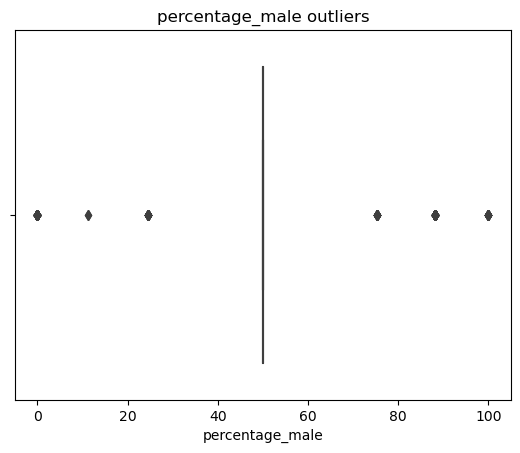

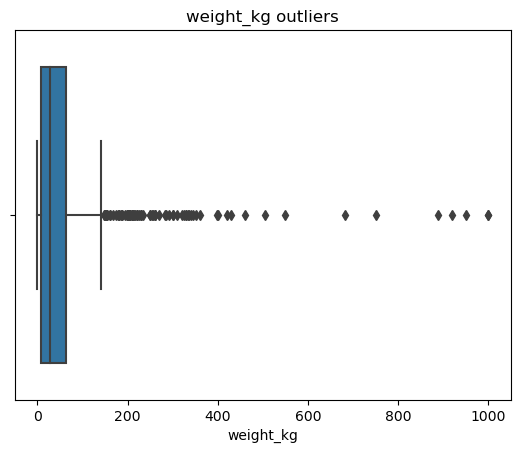

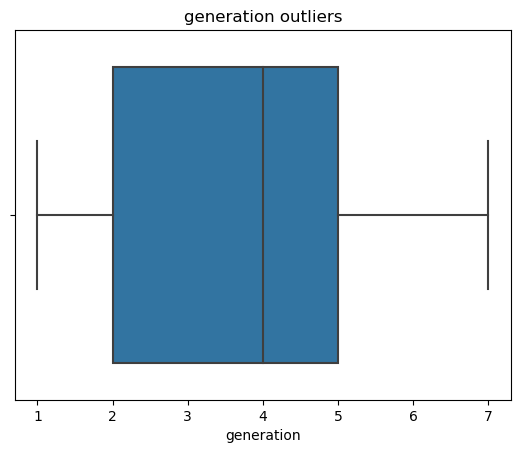

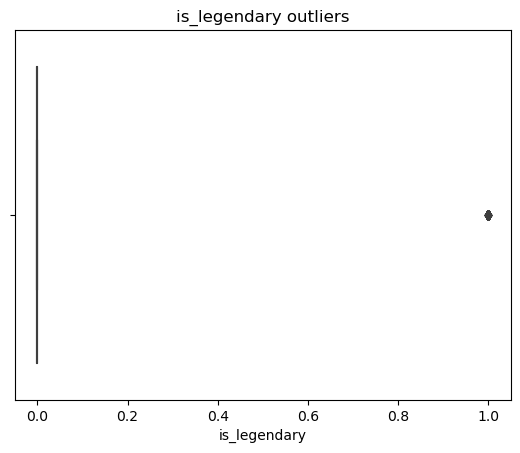

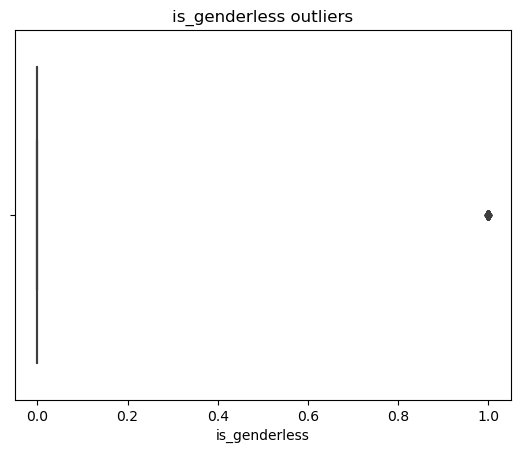

In [125]:
# Create a boxplot for each column in the dataframe
for col in data.columns:
    plt.figure()
    sns.boxplot(x=data[col], whis=1.5)
    plt.title(col + " outliers")

In [126]:
# Variable Variance - dropping constant variables and variables with extremely low variance (quasi-constant), as Support Vector Machine models are sensitive to low variance variables

In [127]:
var_thr= VarianceThreshold(threshold=0.0) #this means 100% of all values within the column are the same, in other words constant/zero variance variable
var_thr.fit(data)

var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [128]:
concol = [column for column in data.columns 
          if column not in data.columns[var_thr.get_support()]]

for features in concol:
    print(features)

In [129]:
#As the function returns nothing, that means there are no constant/zero variance variables.

In [130]:
#### I have decided to benchmark the variance threshold to the ratio of legendary pokemon to the total pokemon in the dataset, which is 70/801. [There is no hard and fast rule on setting variance thresholds](https://scikit-learn.org/stable/modules/feature_selection.html) but I believe it takes into account the significant imbalance between the minority and the majority target class.

In [131]:
var_thr= VarianceThreshold(threshold=(70/801)) # 70/801= 0.0873, and that means at least 87.3% of all values within the column are the same
var_thr.fit(data)

var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True])

In [132]:
concol = [column for column in data.columns 
          if column not in data.columns[var_thr.get_support()]]

for features in concol:
    print(features)

against_normal
is_legendary


In [133]:
var_thr= VarianceThreshold(threshold=0.09) # that means at least 90% of all values within the column are the same
var_thr.fit(data)
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True])

In [134]:
concol = [column for column in data.columns 
          if column not in data.columns[var_thr.get_support()]]

for features in concol:
    print(features)

against_normal
is_legendary


In [135]:
# is_legendary can't be dropped as it is the target variable, but we most certainly can drop against_normal --at least 90% of all its values are the same!!!

In [136]:
data.drop(columns=['against_normal'])
data.info() # to confirm that against_normal has been dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [137]:
### Feature Importance [Credits to Noa Azaria for the code](https://www.aporia.com/learn/feature-importance/feature-importance-7-methods-and-a-quick-tutorial/) and [Brian Roepke for further insturction!](https://www.dataknowsall.com/featureselection.html)

In [138]:
data1= data.copy()

In [139]:
# Separate features and target
X = data1.drop(columns=['is_legendary'])
y = data1['is_legendary']

In [140]:
# Initialize the Random Forest Classifier model
rf_model=RandomForestClassifier(random_state=42, n_jobs=None, class_weight='balanced')

              Feature  Importance
19         base_total    0.242119
27      is_genderless    0.193286
21  experience_growth    0.127120
24    percentage_male    0.112114
18     base_happiness    0.098455
20       capture_rate    0.093458
23                 hp    0.036258
22           height_m    0.031535
25          weight_kg    0.014639
26         generation    0.007510
14    against_psychic    0.006730
5       against_fight    0.006490
1        against_dark    0.005274
7      against_flying    0.003073
0         against_bug    0.002751
16      against_steel    0.002452
11        against_ice    0.002224
10     against_ground    0.002197
8       against_ghost    0.002113
6        against_fire    0.001913
9       against_grass    0.001625
2      against_dragon    0.001436
4       against_fairy    0.001161
15       against_rock    0.001151
17      against_water    0.000993
3    against_electric    0.000904
13     against_poison    0.000846
12     against_normal    0.000170


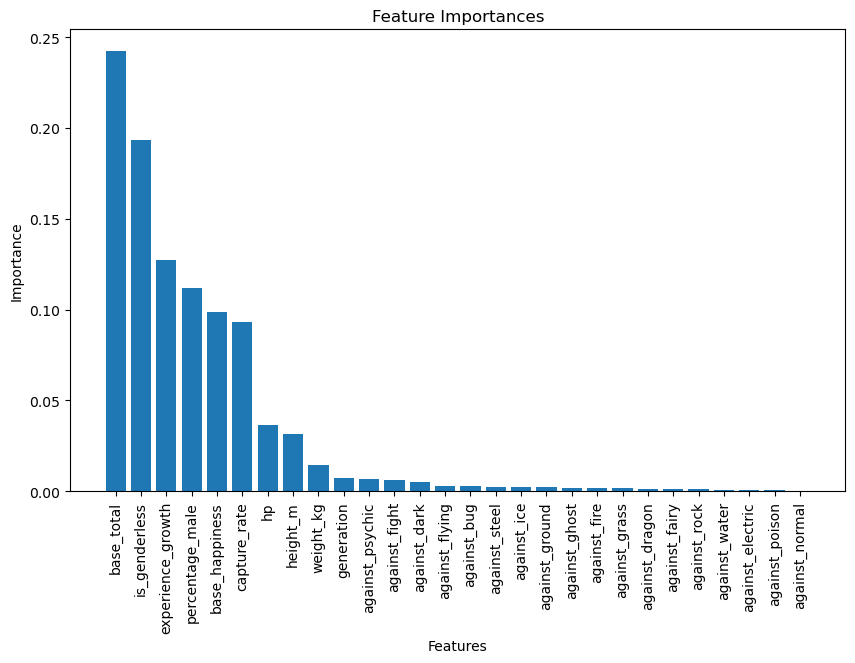

In [141]:
# Let's fit the model
rf_model.fit(X,y)

# ...And obtain the feature importances
feature_importances= pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize the feature importances with a sassy bar plot (after printing a table)
print(feature_importances)
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


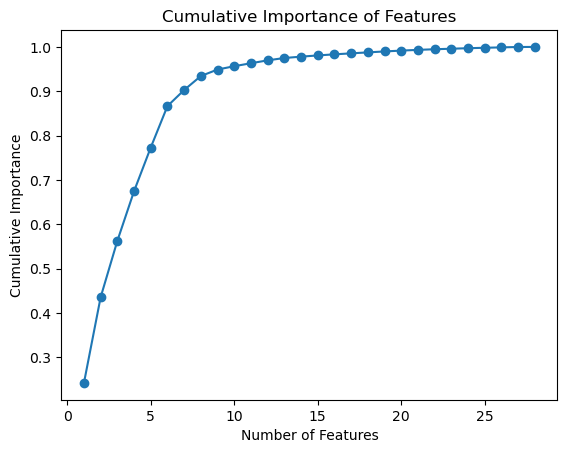

In [142]:
cumulative_importance = feature_importances['Importance'].cumsum()

# Plot the cumulative sum of feature importances
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.show()

In [143]:
# From the table and bar chart, it appears that all variables after 'generation' have significantly diminishing feature importance to the model. To cross validate, I made a culmulative line plot to see where the 'elbow' would be. The plot supports the conclusion ideal number of features is between 7-9, and the variable 'generation' happens to be the 9th. Thus we can drop all against_() variables from the dataframe. However, i might still reverse this process at the end if the performance of the model suffers. 

In [144]:
data.drop(columns=['against_psychic', 'against_dark', 'against_ghost', 'against_fight','against_ice', 'against_ground', 'against_bug', 'against_steel','against_flying', 'against_grass', 'against_fairy', 'against_electric','against_poison', 'against_dragon', 'against_rock', 'against_fire','against_water', 'against_normal'], inplace=True)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   base_happiness     801 non-null    int64  
 1   base_total         801 non-null    int64  
 2   capture_rate       801 non-null    int64  
 3   experience_growth  801 non-null    int64  
 4   height_m           801 non-null    float64
 5   hp                 801 non-null    int64  
 6   percentage_male    801 non-null    float64
 7   weight_kg          801 non-null    float64
 8   generation         801 non-null    int64  
 9   is_legendary       801 non-null    int64  
 10  is_genderless      801 non-null    int32  
dtypes: float64(3), int32(1), int64(7)
memory usage: 104.3 KB


In [146]:
data.to_csv('pokemon_cleaned.csv', index=False)

<h2 style="font-family: 'Constantia'; font-size: 36px; color: #FFA500;"> 4 👩‍💻 Logistic Regression + Oversampling 👩‍💻
<p style="color:#FAC898; font-family: 'Constantia', cursive;"> 🧠 SMOTE +RandomOversampler + StratifiedKFold Cross Val + Hyperparameter Tuning 🧠 </p></h2>

<img src="https://media.tenor.com/IdQJwgoeSNwAAAAC/pokemon-what.gif" alt= "Question marks">

In [147]:
#Baseline Model After Scaling- Without Over or UnderSampling

In [148]:
data['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [149]:
features = ['base_total', 'capture_rate', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'weight_kg', 'generation', 'is_legendary', 'is_genderless']
X= data[features]
y= data['is_legendary']

scaler=StandardScaler() #MinMaxScaler
X_scaled=scaler.fit_transform(X)


In [150]:
#I chose Standard Scaler because it is less susceptible to outliers, which means the outliers I have left intact in this project has less influence on the scaling process.

In [151]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.3, random_state=42)
logisticregression=LogisticRegression()
logisticregression.fit(X_train, y_train)
predictions= logisticregression.predict(X_test)

In [152]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test,predictions)))


Accuracy: 1.00



In [153]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00        25

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



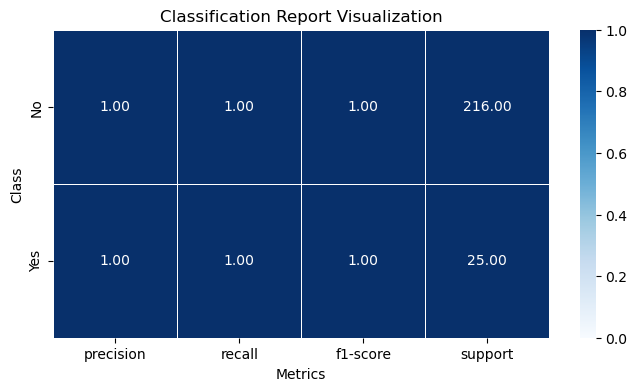

In [154]:
classification_data={"precision":[1.00, 1.00], "recall":[1.00,1.00], "f1-score":[1.00, 1.00], "support": [216, 25]}
classification_df= pd.DataFrame(classification_data, index=['No','Yes'])

plt.figure(figsize=(8,4))
sns.heatmap(classification_df, annot=True, cmap='Blues', fmt=".2f", vmin=0, vmax=1, linewidths= 0.5)
plt.title("Classification Report Visualization")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()


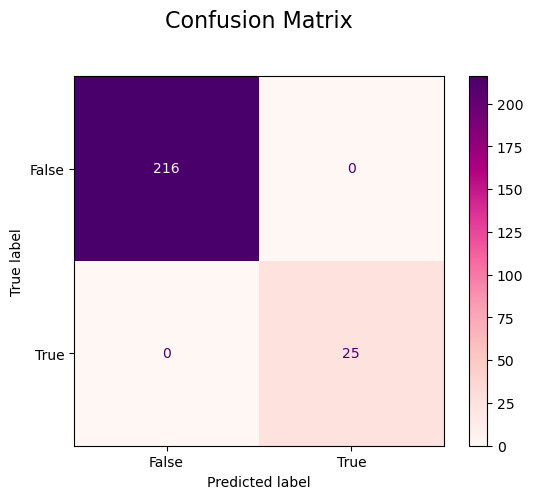

In [155]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='RdPu', values_format='d')
plt.text(0.5, 1.15, 'Confusion Matrix', fontsize=16, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [156]:
#Is this a case of overfitting? Running a K Fold Cross Validation analysis should be able tell us if it really is the case of premature celebration

In [157]:
features = data.drop(columns=['is_legendary']) 
target = data['is_legendary']  

classifier = LogisticRegression()  # My chosen classifier

# Define the number of folds for cross-validation (k)
num_folds = 10  

# Create a k-fold cross-validation object
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores for each fold
accuracy_scores = cross_val_score(classifier, features, target, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.2f}")

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()

print('\nMean Accuracy: {:.2f}\n'.format(mean_accuracy))

Fold 1: Accuracy = 0.98
Fold 2: Accuracy = 0.95
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 0.99
Fold 5: Accuracy = 0.94
Fold 6: Accuracy = 0.99
Fold 7: Accuracy = 0.95
Fold 8: Accuracy = 0.97
Fold 9: Accuracy = 0.97
Fold 10: Accuracy = 0.96

Mean Accuracy: 0.97



In [158]:
# It isn't a case overfitting! But there is still room to improve the prediction, recall and f1 scores of 'Yes' predictions before moving on to other models

In [159]:
#Oversampling the minority class using Random Oversampler


In [160]:
ros= RandomOverSampler()
X_ros,y_ros= ros.fit_resample(X,y)

In [161]:
y_ros.value_counts()

0    731
1    731
Name: is_legendary, dtype: int64

In [162]:
classification = LogisticRegression() 

transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)
X_train, X_test, y_train, y_test = train_test_split(X, y_ros, test_size=0.3, random_state=100)# Create an instance of the LogisticRegression class
classification.fit(X_train, y_train)
predictions = classification.predict(X_test)
accuracy= accuracy_score(y_test, predictions)

print("Accuracy after RandomOversampler:", accuracy)


Accuracy after RandomOversampler: 1.0


In [163]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       219

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



In [164]:
# Define the number of folds for cross-validation (k)
num_folds = 10  # You can change this value as per your requirement

# Create a k-fold cross-validation object
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores for each fold
accuracy_scores = cross_val_score(classification, X_ros, y_ros, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.2f}")

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()

print('\nMean Accuracy: {:.2f}\n'.format(mean_accuracy))

Fold 1: Accuracy = 0.92
Fold 2: Accuracy = 0.93
Fold 3: Accuracy = 0.90
Fold 4: Accuracy = 0.95
Fold 5: Accuracy = 0.81
Fold 6: Accuracy = 0.95
Fold 7: Accuracy = 0.89
Fold 8: Accuracy = 0.95
Fold 9: Accuracy = 0.89
Fold 10: Accuracy = 0.93

Mean Accuracy: 0.91



In [165]:
# Disparity in accuracy is an indication of overfitting, as StratifiedKFolds tests the model on multiple sets of unseen data. That means we should try SMOTE instead!!!!

In [166]:
#Oversampling the minority class using SMOTE

In [167]:
#starting anew just in case
data= pd.read_csv('pokemon_cleaned.csv')
data.head()

,base_happiness,base_total,capture_rate,experience_growth,height_m,hp,percentage_male,weight_kg,generation,is_legendary,is_genderless
0,70,318,45,1059860,0.7,45,88.1,6.9,1,0,0
1,70,405,45,1059860,1.0,60,88.1,13.0,1,0,0
2,70,625,45,1059860,2.0,80,88.1,100.0,1,0,0
3,70,309,45,1059860,0.6,39,88.1,8.5,1,0,0
4,70,405,45,1059860,1.1,58,88.1,19.0,1,0,0


In [168]:
smote= SMOTE() 
features = ['base_total', 'capture_rate', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'weight_kg', 'generation', 'is_legendary', 'is_genderless']
X= data[features]
y= data['is_legendary']
X_sm, y_sm= smote.fit_resample(X, y)
y_sm.value_counts()

0    731
1    731
Name: is_legendary, dtype: int64

In [169]:
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
logisticregression_smote= LogisticRegression()
logisticregression_smote.fit(X_train, y_train)
y_pred=logisticregression_smote.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)

In [170]:
print("Accuracy after SMOTE:", accuracy)

Accuracy after SMOTE: 0.9498861047835991


In [171]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       222
           1       0.94      0.96      0.95       217

    accuracy                           0.95       439
   macro avg       0.95      0.95      0.95       439
weighted avg       0.95      0.95      0.95       439



In [172]:
# Define the number of folds for cross-validation (k)
num_folds = 10 

# Create a k-fold cross-validation object
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores for each fold
accuracy_scores = cross_val_score(logisticregression_smote, X_sm, y_sm, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.2f}")

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()

print('\nMean Accuracy: {:.2f}\n'.format(mean_accuracy))

Fold 1: Accuracy = 0.98
Fold 2: Accuracy = 0.95
Fold 3: Accuracy = 0.93
Fold 4: Accuracy = 0.93
Fold 5: Accuracy = 0.94
Fold 6: Accuracy = 0.97
Fold 7: Accuracy = 0.90
Fold 8: Accuracy = 0.98
Fold 9: Accuracy = 0.95
Fold 10: Accuracy = 0.95

Mean Accuracy: 0.95



In [173]:
#Hyperparameter Tuning -- Credits to Finn Qiao, code adapted from[here](https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5)

In [174]:
logisticregression_smote = LogisticRegression() # define the hyperparameter grid
param_grid =  {'penalty' : ['l1', 'l2'], # lasso or ridge regularization?
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],} # is suitable for small to medium datasets for binary classification

grid_search = GridSearchCV(logisticregression_smote, param_grid, cv=5) # create the GridSearchCv object  
grid_search.fit(X_train, y_train) # fit the above object to my training data
    
best_params= grid_search.best_params_ # what are the best hyperparameters that were found during the GridSearchCV process?
best_model= grid_search.best_estimator_ # define before fitting, because the best hyperparameters will be saved into this model and i will use this to evaluate the model 

y_pred = best_model.predict(X_test) # let's make predictions based on the hyperparameters we found
    
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
    
    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       217

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



In [175]:
#Using StratifiedKFold once again to cross validate

In [176]:
# Define the number of folds for cross-validation (k)
num_folds = 10  # You can change this value as per your requirement

# Create a k-fold cross-validation object
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get the accuracy scores for each fold
accuracy_scores = cross_val_score(logisticregression_smote, X_sm, y_sm, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.2f}")

# Calculate the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()

print('\nMean Accuracy: {:.2f}\n'.format(mean_accuracy))

Fold 1: Accuracy = 0.98
Fold 2: Accuracy = 0.95
Fold 3: Accuracy = 0.93
Fold 4: Accuracy = 0.93
Fold 5: Accuracy = 0.94
Fold 6: Accuracy = 0.97
Fold 7: Accuracy = 0.90
Fold 8: Accuracy = 0.98
Fold 9: Accuracy = 0.95
Fold 10: Accuracy = 0.95

Mean Accuracy: 0.95



In [177]:
# There is little evidence of overfitting as the model performs fairly well across all 10 folds :) Also, the ROC curve and AUC metrics are unnecessary as 

<h2 style="font-family: 'Constantia'; font-size: 36px; color: #A7C7E7;"> 5 🕺🏻 Other binary classification models 🕺🏻
<p style="color:#54AD56; font-family: 'Constantia', cursive;"> 💃🏻 KNeighboursClassifier, Decision Tree Classifier,  and Gaussian Naive Bayes 💃🏻 </p></h2>

<img src="https://media.tenor.com/qObvHG4rT28AAAAC/pikachu-pokemon.gif" alt="Hehehehe">

In [178]:
#Unlike logistic regression, models such as SVM and KNeighborsClassifier are sensitive to skewed data. So before I proceed, I will first visualize the density of all the variables before applying log transformation selectively. Log transforming my variables wasn't necessary for performing a logistic regression, and so I decided not to preprocess all the data at once so that it's easier to distinguish their effects on model performance from one another. It's also easier to choose which variables to log transform at the end as there are fewer variables remaining

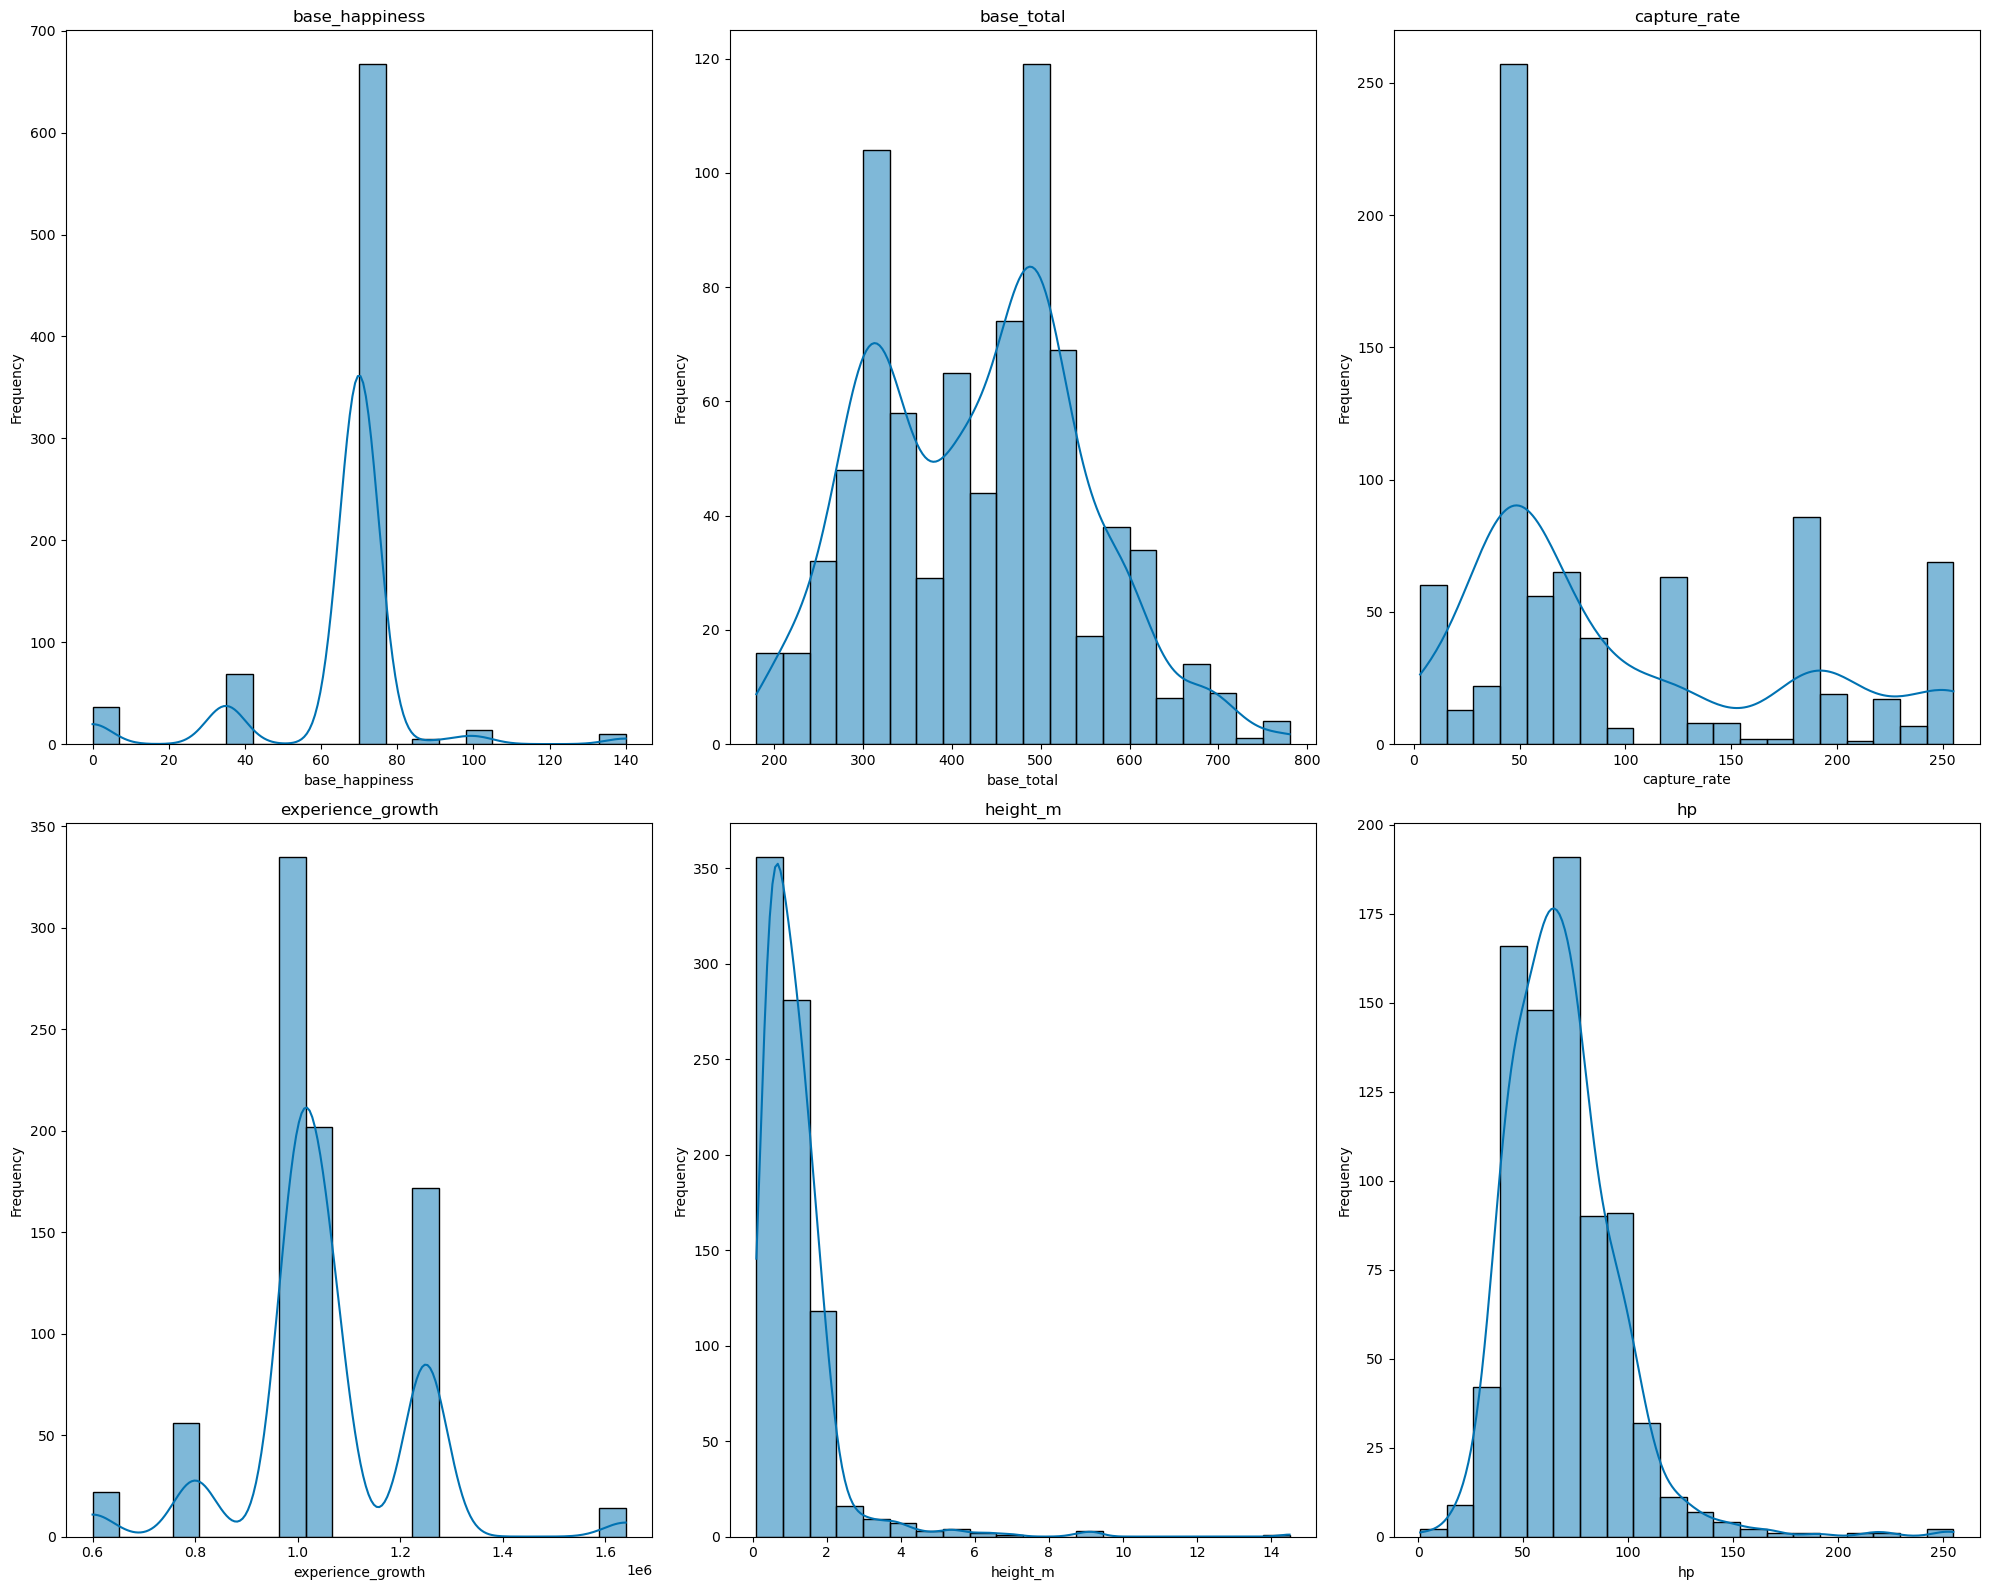

In [179]:
# Create a visualization of the features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 16))
color = '#0072B2'  # blue

for i, ax in enumerate(axes.flat):
    if i >= len(data.columns):
        break
    sns.histplot(data=data, x=data.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(data.columns[i])
    ax.set_xlabel(data.columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [180]:
#From the visualizations above, we can observe that capture_rate, height_m, and height_m are good candidates for log transformation as they have visibly long distribution curve tails.

In [181]:
#Log transforming variables using log1p

In [182]:
data['capture_rate'] =np.log1p(data['capture_rate'])
data['height_m'] = np.log1p(data['height_m'])
data['weight_kg'] = np.log1p(data['weight_kg'])     

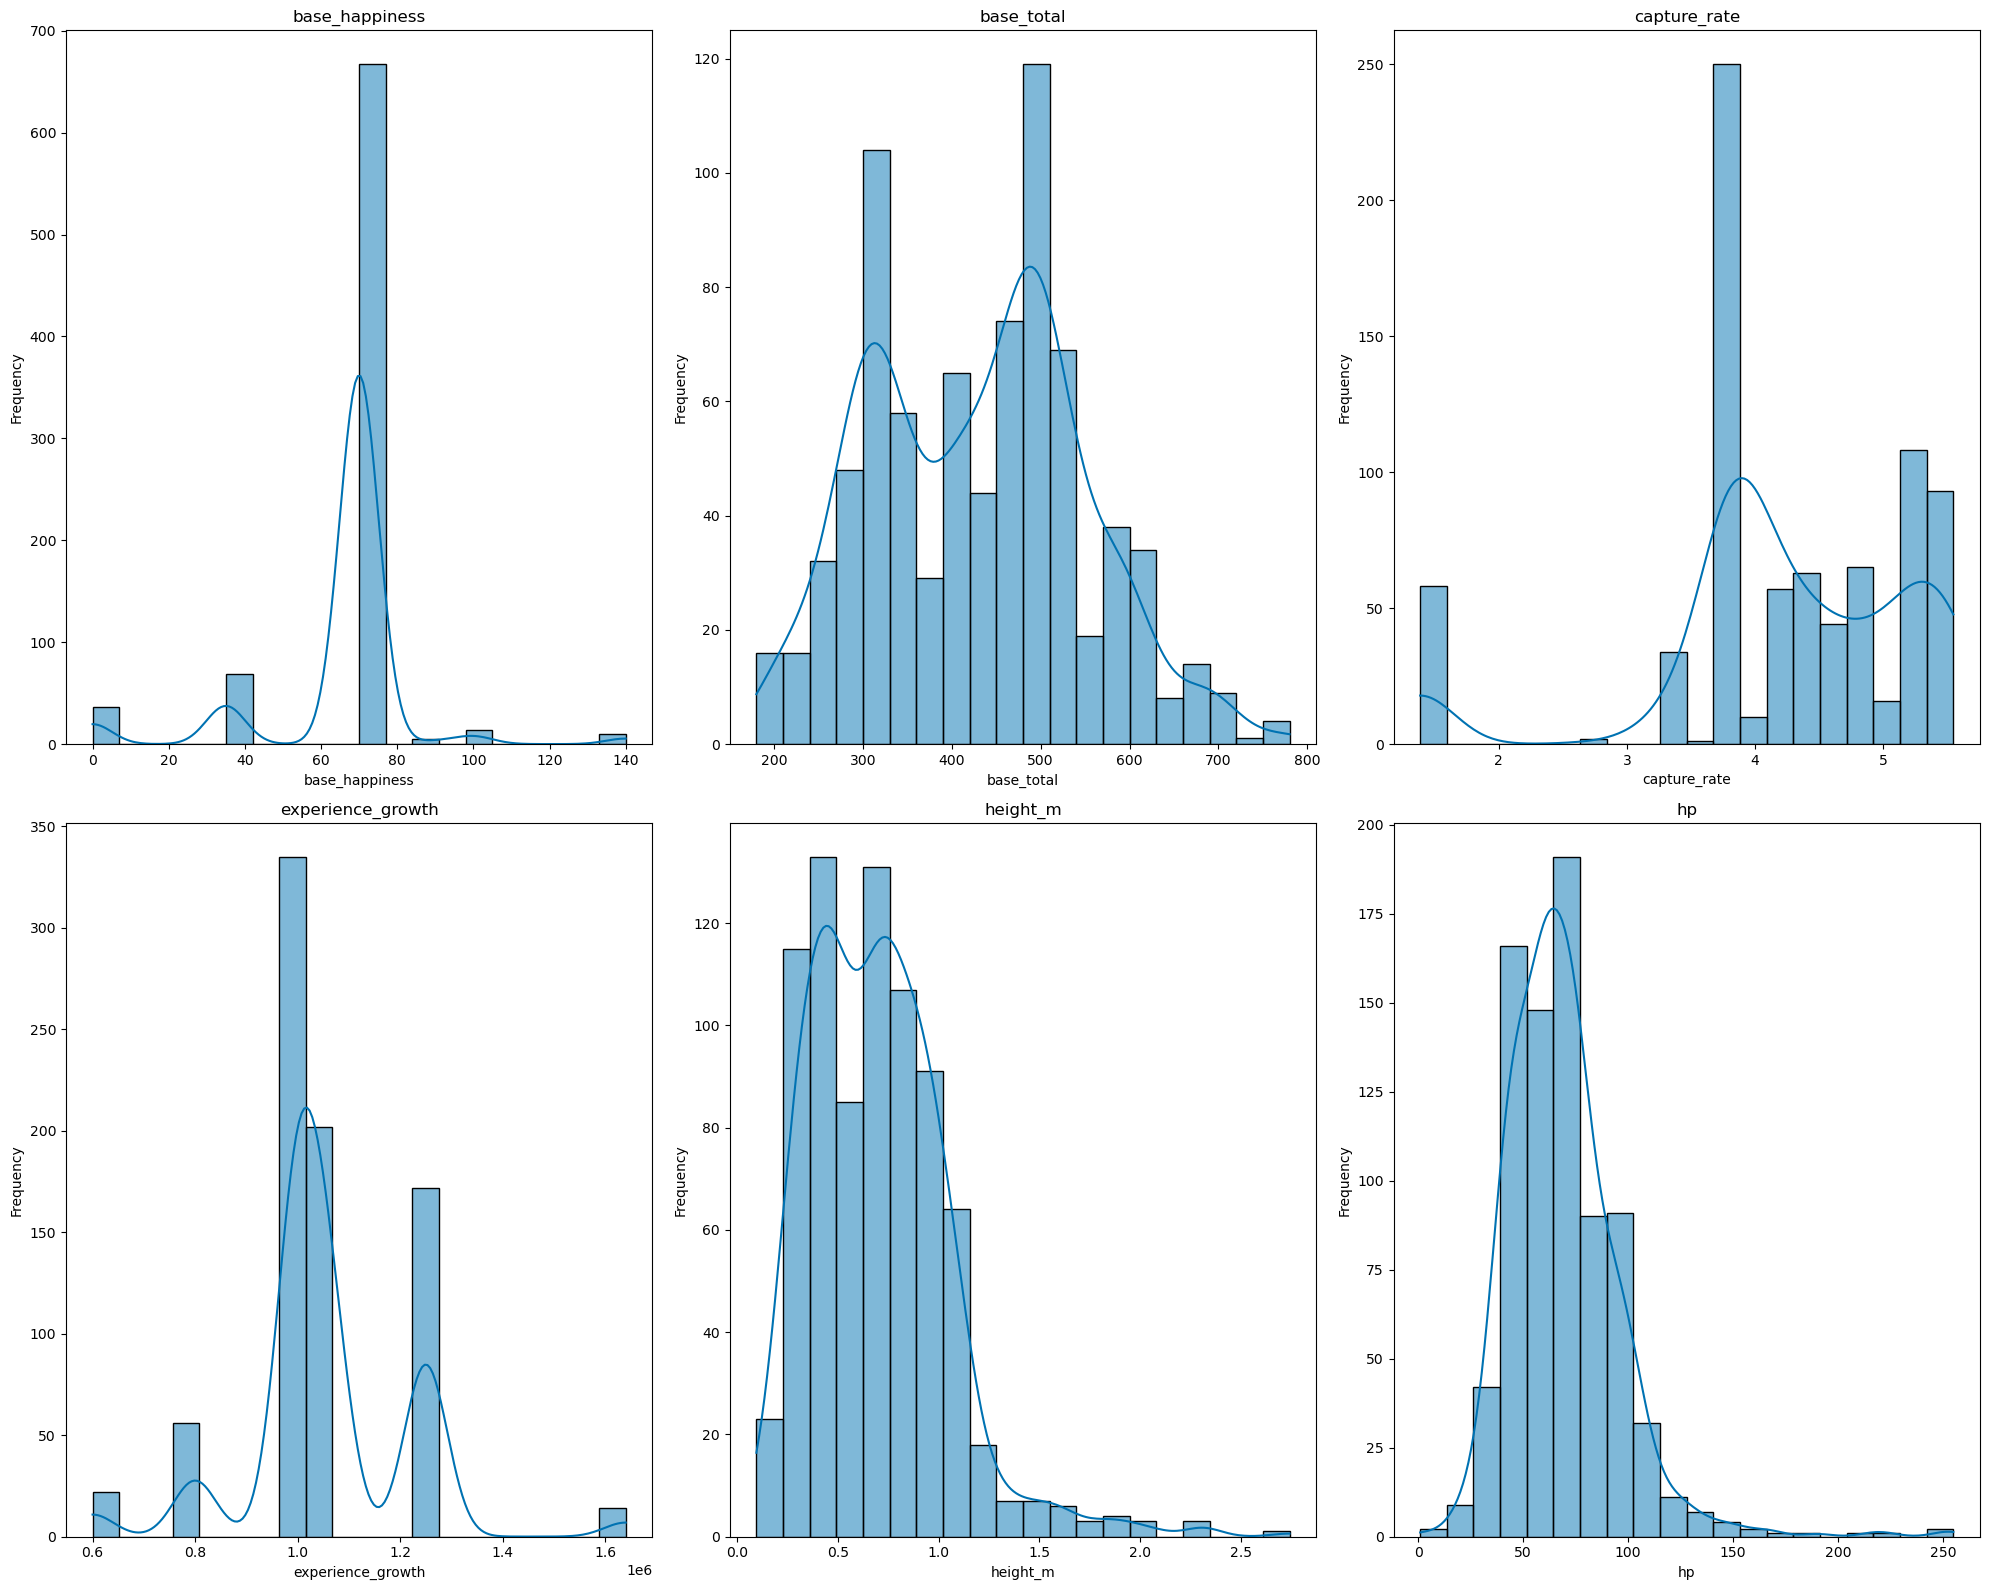

In [183]:
# Create a visualization of the features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 16))
color = '#0072B2'  # blue

for i, ax in enumerate(axes.flat):
    if i >= len(data[['capture_rate', 'height_m', 'weight_kg']]):
        break
    sns.histplot(data=data, x=data.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(data.columns[i])
    ax.set_xlabel(data.columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [184]:
#Testing out other models

In [185]:
models = [KNeighborsClassifier(), DecisionTreeClassifier()] # test some other fancy binary classification models

In [186]:
# Just to confirm we're using SMOTE data here!

In [187]:
smote = SMOTE()
features = ['base_total', 'capture_rate', 'experience_growth', 'height_m', 'hp', 'percentage_male', 'weight_kg', 'generation', 'is_legendary', 'is_genderless']
X = data[features]
y = data['is_legendary']
X_sm, y_sm = smote.fit_resample(X, y)


In [188]:
for model in models:
    model_name = type(model).__name__
    print(f"Fitting {model_name}...")
    model.fit(X_sm, y_sm)
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    print(f"{model_name} Classification Report:")
    print(report)
    print("\n" + "=" * 70 + "\n")  

Fitting KNeighborsClassifier...
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       222
           1       0.98      0.99      0.98       217

    accuracy                           0.98       439
   macro avg       0.98      0.98      0.98       439
weighted avg       0.98      0.98      0.98       439



Fitting DecisionTreeClassifier...
DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       217

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439





In [189]:
#Hyperparameter tuning 

In [190]:
# List of models for hyperparameter tuning
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),

]

# Define the hyperparameter grid for each model
param_grids = [
    {
        'n_neighbors': [3, 5, 7],  # number of neighbors
        'weights': ['uniform', 'distance'],  # weight function used in prediction
        'metric': ['euclidean', 'manhattan'],  # distance metric used for the tree
    },  # For KNeighborsClassifier

    {
        'criterion': ['gini', 'entropy'],  # criterion to measure the quality of a split
        'max_depth': [None, 10, 20, 30],  # maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    },  # For DecisionTreeClassifier
    
]
for i, model in enumerate(models):
    model_name = type(model).__name__
    print(f"Tuning hyperparameters for {model_name}...")

    # Create a GridSearchCV object for the current model
    grid_search = GridSearchCV(model, param_grids[i], cv=5, scoring='accuracy', verbose=0) # tried verbosity, doesn't produce output

    # Fit the GridSearchCV object to the upsampled data
    grid_search.fit(X_sm, y_sm)

    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f"Best hyperparameters for {model_name}: {best_params}")

    # Make predictions using the best model
    y_pred = best_model.predict(X_test)

    report = classification_report(y_test, y_pred)
    print(f"{model_name} Classification Report:")
    print(report)
    print("\n" + "=" * 70 + "\n")

Tuning hyperparameters for KNeighborsClassifier...
Best hyperparameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       222
           1       0.99      1.00      0.99       217

    accuracy                           0.99       439
   macro avg       0.99      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439



Tuning hyperparameters for DecisionTreeClassifier...
Best hyperparameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       217

    accuracy                           1.00       439
   macro avg       1.00      1.00

In [191]:
#Cross validation using StratifiedKFolds

In [198]:
for model in models:
    model_name = type(model).__name__
    print(f"Evaluating {model_name}...")

    # Initialize StratifiedKFold with 10 splits for extra accuracy
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # List to store accuracy scores for each fold
    accuracy_scores = []

    # Perform StratifiedKFold cross-validation
    for fold_idx, (train_index, test_index) in enumerate(skf.split(X, y), 1): # idx keeps track of scores from each fold!
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model to the current training fold
        model.fit(X_train, y_train)

        # Make predictions on the current test fold
        y_pred = model.predict(X_test)

        # Calculate accuracy for the current fold
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        # Print the accuracy for the current fold
        print(f"Fold {fold_idx}: Accuracy = {accuracy:.2f}")

    # Calculate the mean accuracy across folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy for the current model
    print(f"\nMean Accuracy: {mean_accuracy:.2f}")
    print("\n" + "=" * 70 + "\n")


Evaluating KNeighborsClassifier...
Fold 1: Accuracy = 0.98
Fold 2: Accuracy = 0.96
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 0.99
Fold 5: Accuracy = 0.97
Fold 6: Accuracy = 0.99
Fold 7: Accuracy = 0.97
Fold 8: Accuracy = 0.99
Fold 9: Accuracy = 0.97
Fold 10: Accuracy = 0.99

Mean Accuracy: 0.98


Evaluating DecisionTreeClassifier...
Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 1.00
Fold 3: Accuracy = 1.00
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 1.00
Fold 6: Accuracy = 1.00
Fold 7: Accuracy = 1.00
Fold 8: Accuracy = 1.00
Fold 9: Accuracy = 1.00
Fold 10: Accuracy = 1.00

Mean Accuracy: 1.00




In [193]:
<h2 style="font-family: 'Constantia'; font-size: 36px; color: #A7C7E7;"> 6 🥳 Conclusion 🥳

SyntaxError: invalid character '🥳' (U+1F973) (3845658979.py, line 1)

In [ ]:
Model performance after Hyperparameter tuning

| Model                    | Precision | Recall | F1-Score | Accuracy | Support |
|--------------------------|-----------|--------|----------|----------|---------|
| KNeighborsClassifier     | 0.99      | 0.99   | 0.99     | 0.99     | 439     |
| DecisionTreeClassifier   | 1.00      | 1.00   | 1.00     | 1.00     | 439     |
| Logistic Regression      | 1.00      | 1.00   | 1.00     | 1.00     | 439     |
| GaussianNB*              | 0.92*     | 0.91*  | 0.92*    | 0.92*    | 439*    |


* These scores (GaussianNB) are from the baseline model more time needed to tune hyperparameters


Final Remarks

- The StratifiedKFolds Cross Validation indicates there is no overfitting -- rather, the almost perfect scores can be explained by the artifical nature of the data
- The ROC curve and AUC metrics are unnecessary as all model scores are close to 1, which means the curve gives no further insight
- More time is needed to tune the hyperparameters of the Gaussian Naive Bayes model
- I have also built a Streamlit app based on this project that predicts whether a Pokemon is legendary or not; feel free to check it out!


Nicole

